## Part 2A

### 1998 Data

In [1]:
import pandas as pd 
import numpy as np 

Use these packages to manipulate Data Frames.

In [2]:
Year1998_df = pd.read_csv('1998.csv')        # Use pandas to read csv file as Data Frame

Read 1998 csv file as a data frame.

In [3]:
Year1998_df = Year1998_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year1998_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        1998      1          17          6    840.0       0.0
1        1998      1          18          7    830.0     -10.0
2        1998      1          19          1    831.0      -9.0
3        1998      1          20          2    836.0      -4.0
4        1998      1          21          3    836.0      -4.0
...       ...    ...         ...        ...      ...       ...
5384716  1998     12          27          7   1453.0      -4.0
5384717  1998     12          28          1   1520.0      23.0
5384718  1998     12          29          2   1507.0      10.0
5384719  1998     12          30          3   1510.0      13.0
5384720  1998     12          31          4   1513.0      16.0

[5384721 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [4]:
Year1998_df.isna().sum()    # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       157670
ArrDelay      157670
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [5]:
Year1998_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)      # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [6]:
Year1998_df.isna().sum()        # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [7]:
Year1998_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  5.22705e+06  5.22705e+06  5.22705e+06  5.22705e+06  5.22705e+06   
mean          1998      6.52521      15.7305      3.94845      1493.04   
std              0      3.44287      8.77895      1.98871      510.879   
min           1998            1            1            1            1   
25%           1998            4            8            2         1113   
50%           1998            7           16            4         1524   
75%           1998           10           23            6         1923   
max           1998           12           31            7         2400   

          ArrDelay  
count  5.22705e+06  
mean       7.58697  
std         31.341  
min          -1233  
25%             -7  
50%              0  
75%             11  
max           1808

Noticed that 'ArrDelay' column might have outliers as the minimum is -1233 and maximum is 1808 which are more than 20 hours.

In [8]:
Q1 = np.percentile(Year1998_df['ArrDelay'], 25)   # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year1998_df['ArrDelay'], 75)   # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                     # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR                           # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR                           # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-34.0, 38.0)

The lower limit is -34 minutes and upper limit is 38 minutes.

In [9]:
Year1998_df = Year1998_df[(Year1998_df.ArrDelay <= Upper) & (Year1998_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [10]:
Year1998_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 38 or less than negative 34 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  4.76699e+06  4.76699e+06  4.76699e+06  4.76699e+06  4.76699e+06   
mean          1998      6.54782      15.7264      3.95199      1481.88   
std              0      3.44144      8.79502      1.99342      495.019   
min           1998            1            1            1            1   
25%           1998            4            8            2         1107   
50%           1998            7           16            4         1509   
75%           1998           10           23            6         1910   
max           1998           12           31            7         2400   

          ArrDelay  
count  4.76699e+06  
mean      0.494906  
std        12.5681  
min            -34  
25%             -8  
50%             -1  
75%              7  
max             38

There were no outliers and values are in acceptable range.

Noticed that the minimum for 'ArrTime' column is 1 and maximum is 2400 which is in acceptable range.

Thus, we need make sure 'ArrTime' column has a format that is readable and consistent as 1 can be an invalid time in 24hour clock.

In [11]:
Year1998_df['ArrTime'] = Year1998_df['ArrTime']/100     # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year1998_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2204480927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1998_df['ArrTime'] = Year1998_df['ArrTime']/100     # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        1998      1          17          6     8.40       0.0
1        1998      1          18          7     8.30     -10.0
2        1998      1          19          1     8.31      -9.0
3        1998      1          20          2     8.36      -4.0
4        1998      1          21          3     8.36      -4.0
...       ...    ...         ...        ...      ...       ...
5384716  1998     12          27          7    14.53      -4.0
5384717  1998     12          28          1    15.20      23.0
5384718  1998     12          29          2    15.07      10.0
5384719  1998     12          30          3    15.10      13.0
5384720  1998     12          31          4    15.13      16.0

[4766992 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock. 

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm

In [12]:
def f(row):                                        # Define 'f' function with parameter that is rows
    if 6 <= row['ArrTime'] <= 11.59 :              # If 'ArrTime' value falls between 6 to 12, it is 'Morning'
        val = 'Morning'
    elif 12 <= row['ArrTime'] <= 17.59 :           # If 'ArrTime' value falls between 12 to 18, it is 'Afternoon'
        val = 'Afternoon'
    elif 18 <= row['ArrTime'] <= 20.59 :           # If 'ArrTime' value falls between 18 to 21, it is 'Evening'
        val = 'Evening'
    else:
        val = 'Night'                              # Values that are in other range will be considered as 'Night'
    return val

Created a function called 'f' with parameter is row.

In [13]:
Year1998_df['TimeofDay'] = Year1998_df.apply(f, axis=1)  
Year1998_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\1799607838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1998_df['TimeofDay'] = Year1998_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay
0        1998      1          17          6     8.40       0.0    Morning
1        1998      1          18          7     8.30     -10.0    Morning
2        1998      1          19          1     8.31      -9.0    Morning
3        1998      1          20          2     8.36      -4.0    Morning
4        1998      1          21          3     8.36      -4.0    Morning
...       ...    ...         ...        ...      ...       ...        ...
5384716  1998     12          27          7    14.53      -4.0  Afternoon
5384717  1998     12          28          1    15.20      23.0  Afternoon
5384718  1998     12          29          2    15.07      10.0  Afternoon
5384719  1998     12          30          3    15.10      13.0  Afternoon
5384720  1998     12          31          4    15.13      16.0  Afternoon

[4766992 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am. 

In [14]:
def g(row):                             # Define 'g' function with parameter that is row
    if row['ArrDelay'] > 15:            # If 'ArrDelay' value is more than 15, it is a 'Yes'
        val = 'Yes'
    elif row['ArrDelay'] <= 15:         # Or else, it will be considered as a 'No'
        val = 'No'
    return val

Created a function called 'g' with parameter is row.

In [15]:
Year1998_df['DelayStatus'] = Year1998_df.apply(g, axis=1)
Year1998_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\1877231185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1998_df['DelayStatus'] = Year1998_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        1998      1          17          6     8.40       0.0    Morning   
1        1998      1          18          7     8.30     -10.0    Morning   
2        1998      1          19          1     8.31      -9.0    Morning   
3        1998      1          20          2     8.36      -4.0    Morning   
4        1998      1          21          3     8.36      -4.0    Morning   
...       ...    ...         ...        ...      ...       ...        ...   
5384716  1998     12          27          7    14.53      -4.0  Afternoon   
5384717  1998     12          28          1    15.20      23.0  Afternoon   
5384718  1998     12          29          2    15.07      10.0  Afternoon   
5384719  1998     12          30          3    15.10      13.0  Afternoon   
5384720  1998     12          31          4    15.13      16.0  Afternoon   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
5384716          No  
5384717         Yes  
5384718          No  
5384719          No  
5384720         Yes  

[4766992 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [16]:
Average_TimeofDay_Delay1998 = Year1998_df[(Year1998_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay1998

ArrDelay
TimeofDay           
Afternoon  24.342854
Evening    24.803024
Morning    23.778971
Night      25.182110

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Use these packages to plot graphs.

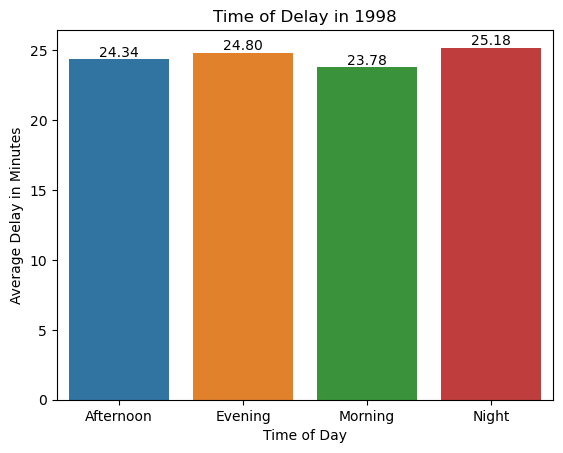

In [18]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay1998.index, y = 'ArrDelay', data = Average_TimeofDay_Delay1998)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 1998")

plt.show()

#### Morning has the least amount of delay duration with 23.78 minutes (nearest 2 decimal point) in 1998.

In [19]:
def h(row):                              # Define 'h' function with parameter that is rows
    if row['DayOfWeek'] == 1 :           # If 'DayOfWeek' value is 1, it is 'Monday'
        val = 'Monday'
    elif row['DayOfWeek'] == 2 :         # If 'DayOfWeek' value is 2, it is 'Tuesday'
        val = 'Tuesday'
    elif row['DayOfWeek'] == 3 :         # If 'DayOfWeek' value is 3, it is 'Wednesday'
        val = 'Wednesday'
    elif row['DayOfWeek'] == 4 :         # If 'DayOfWeek' value is 4, it is 'Thursday'
        val = 'Thursday'
    elif row['DayOfWeek'] == 5 :         # If 'DayOfWeek' value is 5, it is 'Friday'
        val = 'Friday'
    elif row['DayOfWeek'] == 6 :         # If 'DayOfWeek' value is 6, it is 'Saturday'
        val = 'Saturday'
    else:
        val = 'Sunday'                   # Or else, it is 'Sunday'
    return val

Created an 'h' function with parameter is row.

In [20]:
Year1998_df['DayOfWeek'] = Year1998_df.apply(h, axis=1)
Year1998_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\1005986994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1998_df['DayOfWeek'] = Year1998_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        1998      1          17   Saturday     8.40       0.0    Morning   
1        1998      1          18     Sunday     8.30     -10.0    Morning   
2        1998      1          19     Monday     8.31      -9.0    Morning   
3        1998      1          20    Tuesday     8.36      -4.0    Morning   
4        1998      1          21  Wednesday     8.36      -4.0    Morning   
...       ...    ...         ...        ...      ...       ...        ...   
5384716  1998     12          27     Sunday    14.53      -4.0  Afternoon   
5384717  1998     12          28     Monday    15.20      23.0  Afternoon   
5384718  1998     12          29    Tuesday    15.07      10.0  Afternoon   
5384719  1998     12          30  Wednesday    15.10      13.0  Afternoon   
5384720  1998     12          31   Thursday    15.13      16.0  Afternoon   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
5384716          No  
5384717         Yes  
5384718          No  
5384719          No  
5384720         Yes  

[4766992 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [21]:
Average_DayOfWeek_Delay1998 = Year1998_df[(Year1998_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay1998

ArrDelay
DayOfWeek           
Friday     24.527705
Monday     24.492811
Saturday   24.381452
Sunday     24.575729
Thursday   24.543822
Tuesday    24.590356
Wednesday  24.540841

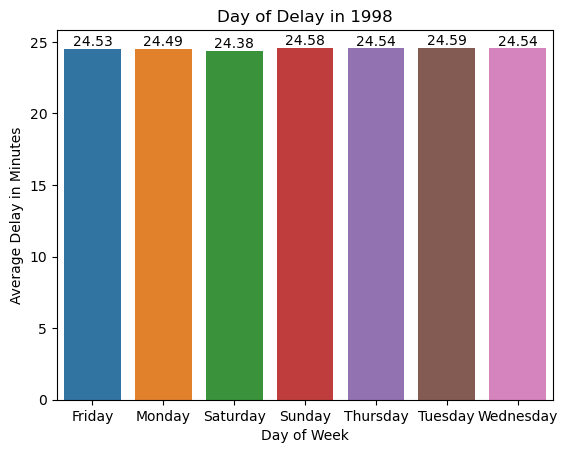

In [22]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay1998.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay1998)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 1998")

plt.show()

#### Saturday has the least amount of delay duration with 24.38 minutes (2 decimal point) in 1998.

### 1999 Data

In [23]:
Year1999_df = pd.read_csv('1999.csv')    # Use pandas to read csv file as Data Frame

Read 1999 csv file as a data frame.

In [24]:
Year1999_df = Year1999_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year1999_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        1999      1          27          3   2024.0      19.0
1        1999      1          28          4   2126.0      81.0
2        1999      1          29          5   2000.0      -5.0
3        1999      1          31          7   2031.0      26.0
4        1999      1           1          5   1707.0      22.0
...       ...    ...         ...        ...      ...       ...
5527879  1999     12          16          4   2112.0      -5.0
5527880  1999     12          17          5   2111.0      -6.0
5527881  1999     12          18          6   2103.0     -14.0
5527882  1999     12          19          7   2114.0      -3.0
5527883  1999     12          20          1   2127.0      10.0

[5527884 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [25]:
Year1999_df.isna().sum()      # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       167866
ArrDelay      167866
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [26]:
Year1999_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)    # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [27]:
Year1999_df.isna().sum()    # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [28]:
Year1999_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  5.36002e+06  5.36002e+06  5.36002e+06  5.36002e+06  5.36002e+06   
mean          1999       6.5913      15.7378      3.93961      1490.69   
std              0      3.42961      8.78397      1.98933      518.304   
min           1999            1            1            1            1   
25%           1999            4            8            2         1110   
50%           1999            7           16            4         1523   
75%           1999           10           23            6         1925   
max           1999           12           31            7         2400   

          ArrDelay  
count  5.36002e+06  
mean        8.2466  
std        33.0076  
min           -194  
25%             -7  
50%              0  
75%             12  
max           1724

Noticed that 'ArrDelay' column might have outliers as the minimum is -194 and maximum is 1724 which are more than 3 hours.

In [29]:
Q1 = np.percentile(Year1999_df['ArrDelay'], 25)  # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year1999_df['ArrDelay'], 75)  # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                    # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR      # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR      # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-35.5, 40.5)

The lower limit is -35.5 minutes and upper limit is 40.5 minutes.

In [30]:
Year1999_df = Year1999_df[(Year1999_df.ArrDelay <= Upper) & (Year1999_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [31]:
Year1999_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 40.5 or less than negative 35.5 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  4.88419e+06  4.88419e+06  4.88419e+06  4.88419e+06  4.88419e+06   
mean          1999      6.63042       15.787      3.93508      1479.33   
std              0      3.43603      8.79518       1.9925      501.562   
min           1999            1            1            1            1   
25%           1999            4            8            2         1104   
50%           1999            7           16            4         1507   
75%           1999           10           23            6         1911   
max           1999           12           31            7         2400   

          ArrDelay  
count  4.88419e+06  
mean      0.700253  
std        13.0754  
min            -35  
25%             -8  
50%             -1  
75%              8  
max             40

There were no outliers and values are in acceptable range.

Noticed that the minimum for 'ArrTime' column is 1 and maximum is 2400 which is in acceptable range.

Thus, we need make sure 'ArrTime' column has a format that is readable and consistent as 1 can be an invalid time in 24hour clock.

In [32]:
Year1999_df['ArrTime'] = Year1999_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year1999_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\1322851683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1999_df['ArrTime'] = Year1999_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        1999      1          27          3    20.24      19.0
2        1999      1          29          5    20.00      -5.0
3        1999      1          31          7    20.31      26.0
4        1999      1           1          5    17.07      22.0
7        1999      1           4          1    17.07      22.0
...       ...    ...         ...        ...      ...       ...
5527879  1999     12          16          4    21.12      -5.0
5527880  1999     12          17          5    21.11      -6.0
5527881  1999     12          18          6    21.03     -14.0
5527882  1999     12          19          7    21.14      -3.0
5527883  1999     12          20          1    21.27      10.0

[4884187 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm

In [33]:
Year1999_df['TimeofDay'] = Year1999_df.apply(f, axis=1)
Year1999_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\593784316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1999_df['TimeofDay'] = Year1999_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay
0        1999      1          27          3    20.24      19.0    Evening
2        1999      1          29          5    20.00      -5.0    Evening
3        1999      1          31          7    20.31      26.0    Evening
4        1999      1           1          5    17.07      22.0  Afternoon
7        1999      1           4          1    17.07      22.0  Afternoon
...       ...    ...         ...        ...      ...       ...        ...
5527879  1999     12          16          4    21.12      -5.0      Night
5527880  1999     12          17          5    21.11      -6.0      Night
5527881  1999     12          18          6    21.03     -14.0      Night
5527882  1999     12          19          7    21.14      -3.0      Night
5527883  1999     12          20          1    21.27      10.0      Night

[4884187 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [34]:
Year1999_df['DelayStatus'] = Year1999_df.apply(g, axis=1)
Year1999_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\790831812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1999_df['DelayStatus'] = Year1999_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        1999      1          27          3    20.24      19.0    Evening   
2        1999      1          29          5    20.00      -5.0    Evening   
3        1999      1          31          7    20.31      26.0    Evening   
4        1999      1           1          5    17.07      22.0  Afternoon   
7        1999      1           4          1    17.07      22.0  Afternoon   
...       ...    ...         ...        ...      ...       ...        ...   
5527879  1999     12          16          4    21.12      -5.0      Night   
5527880  1999     12          17          5    21.11      -6.0      Night   
5527881  1999     12          18          6    21.03     -14.0      Night   
5527882  1999     12          19          7    21.14      -3.0      Night   
5527883  1999     12          20          1    21.27      10.0      Night   

        DelayStatus  
0               Yes  
2                No  
3               Yes  
4               Yes  
7               Yes  
...             ...  
5527879          No  
5527880          No  
5527881          No  
5527882          No  
5527883          No  

[4884187 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [35]:
Average_TimeofDay_Delay1999 = Year1999_df[(Year1999_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay1999

ArrDelay
TimeofDay           
Afternoon  25.006113
Evening    25.486343
Morning    24.277019
Night      26.006853

In [36]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay1999.index, y = 'ArrDelay', data = Average_TimeofDay_Delay1999)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 1999")

plt.show()

#### Morning has the least amount of delay duration with 24.28 minutes (2 decimal point) in 1999.

In [37]:
Year1999_df['DayOfWeek'] = Year1999_df.apply(h, axis=1)
Year1999_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2033938761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1999_df['DayOfWeek'] = Year1999_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        1999      1          27  Wednesday    20.24      19.0    Evening   
2        1999      1          29     Friday    20.00      -5.0    Evening   
3        1999      1          31     Sunday    20.31      26.0    Evening   
4        1999      1           1     Friday    17.07      22.0  Afternoon   
7        1999      1           4     Monday    17.07      22.0  Afternoon   
...       ...    ...         ...        ...      ...       ...        ...   
5527879  1999     12          16   Thursday    21.12      -5.0      Night   
5527880  1999     12          17     Friday    21.11      -6.0      Night   
5527881  1999     12          18   Saturday    21.03     -14.0      Night   
5527882  1999     12          19     Sunday    21.14      -3.0      Night   
5527883  1999     12          20     Monday    21.27      10.0      Night   

        DelayStatus  
0               Yes  
2                No  
3               Yes  
4               Yes  
7               Yes  
...             ...  
5527879          No  
5527880          No  
5527881          No  
5527882          No  
5527883          No  

[4884187 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [38]:
Average_DayOfWeek_Delay1999 = Year1999_df[(Year1999_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay1999


ArrDelay
DayOfWeek           
Friday     25.328046
Monday     25.214274
Saturday   25.078816
Sunday     25.231225
Thursday   25.246794
Tuesday    25.127822
Wednesday  25.211669

In [39]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay1999.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay1999)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 1999")

plt.show()

#### Saturday has the least amount of delay duration with 25.08 minutes (2 decimal point) in 1999.

### 2000 Data

In [40]:
Year2000_df = pd.read_csv('2000.csv')      # Use pandas to read csv file as Data Frame

Read 2000 csv file as a data frame.

In [41]:
Year2000_df = Year2000_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2000_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2000      1          28          5   1906.0       7.0
1        2000      1          29          6   1939.0      40.0
2        2000      1          30          7      NaN       NaN
3        2000      1          31          1   1852.0      -7.0
4        2000      1           1          6   1057.0      -4.0
...       ...    ...         ...        ...      ...       ...
5683042  2000     12           9          6    941.0      -4.0
5683043  2000     12          10          7    925.0     -20.0
5683044  2000     12          11          1    949.0       4.0
5683045  2000     12          12          2   1005.0      20.0
5683046  2000     12          13          3    948.0       3.0

[5683047 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [42]:
Year2000_df.isna().sum()        # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       201744
ArrDelay      201744
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [43]:
Year2000_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)    # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [44]:
Year2000_df.isna().sum()       # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [45]:
Year2000_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year       Month  DayofMonth   DayOfWeek     ArrTime    ArrDelay
count  5.4813e+06  5.4813e+06  5.4813e+06  5.4813e+06  5.4813e+06  5.4813e+06
mean         2000     6.53627      15.741     3.96146      1487.7     10.4729
std             0      3.4316     8.80335     1.99395     526.558          36
min          2000           1           1           1           1       -1298
25%          2000           4           8           2        1108          -7
50%          2000           7          16           4        1522           1
75%          2000          10          23           6        1928          14
max          2000          12          31           7        2400        1441

Noticed that 'ArrDelay' column might have outliers as the minimum is -1298 and maximum is 1441 which are more than 21 hours.

In [46]:
Q1 = np.percentile(Year2000_df['ArrDelay'], 25)    # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2000_df['ArrDelay'], 75)    # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                      # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR          # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR          # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-38.5, 45.5)

The lower limit is -38.5 minutes and upper limit is 45.5 minutes.

In [47]:
Year2000_df = Year2000_df[(Year2000_df.ArrDelay <= Upper) & (Year2000_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [48]:
Year2000_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 45.5 or less than negative 38.5 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  4.96513e+06  4.96513e+06  4.96513e+06  4.96513e+06  4.96513e+06   
mean          2000      6.50342      15.6687      3.94816      1477.31   
std              0      3.43575      8.83601      1.99863      506.124   
min           2000            1            1            1            1   
25%           2000            4            8            2         1102   
50%           2000            7           16            4         1505   
75%           2000           10           23            6         1912   
max           2000           12           31            7         2400   

          ArrDelay  
count  4.96513e+06  
mean       1.74865  
std        14.4056  
min            -38  
25%             -8  
50%              0  
75%              9  
max             45

There were no outliers and values are in acceptable range.

Noticed that the minimum for 'ArrTime' column is 1 and maximum is 2400 which is in acceptable range.

Thus, we need make sure 'ArrTime' column has a format that is readable and consistent as 1 can be an invalid time in 24hour clock.

In [49]:
Year2000_df['ArrTime'] = Year2000_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2000_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\3376618622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2000_df['ArrTime'] = Year2000_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2000      1          28          5    19.06       7.0
1        2000      1          29          6    19.39      40.0
3        2000      1          31          1    18.52      -7.0
4        2000      1           1          6    10.57      -4.0
6        2000      1           3          1    11.21      20.0
...       ...    ...         ...        ...      ...       ...
5683042  2000     12           9          6     9.41      -4.0
5683043  2000     12          10          7     9.25     -20.0
5683044  2000     12          11          1     9.49       4.0
5683045  2000     12          12          2    10.05      20.0
5683046  2000     12          13          3     9.48       3.0

[4965127 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm

In [50]:
Year2000_df['TimeofDay'] = Year2000_df.apply(f, axis=1)
Year2000_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\3796395145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2000_df['TimeofDay'] = Year2000_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay
0        2000      1          28          5    19.06       7.0   Evening
1        2000      1          29          6    19.39      40.0   Evening
3        2000      1          31          1    18.52      -7.0   Evening
4        2000      1           1          6    10.57      -4.0   Morning
6        2000      1           3          1    11.21      20.0   Morning
...       ...    ...         ...        ...      ...       ...       ...
5683042  2000     12           9          6     9.41      -4.0   Morning
5683043  2000     12          10          7     9.25     -20.0   Morning
5683044  2000     12          11          1     9.49       4.0   Morning
5683045  2000     12          12          2    10.05      20.0   Morning
5683046  2000     12          13          3     9.48       3.0   Morning

[4965127 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [51]:
Year2000_df['DelayStatus'] = Year2000_df.apply(g, axis=1)
Year2000_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2151065477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2000_df['DelayStatus'] = Year2000_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay  \
0        2000      1          28          5    19.06       7.0   Evening   
1        2000      1          29          6    19.39      40.0   Evening   
3        2000      1          31          1    18.52      -7.0   Evening   
4        2000      1           1          6    10.57      -4.0   Morning   
6        2000      1           3          1    11.21      20.0   Morning   
...       ...    ...         ...        ...      ...       ...       ...   
5683042  2000     12           9          6     9.41      -4.0   Morning   
5683043  2000     12          10          7     9.25     -20.0   Morning   
5683044  2000     12          11          1     9.49       4.0   Morning   
5683045  2000     12          12          2    10.05      20.0   Morning   
5683046  2000     12          13          3     9.48       3.0   Morning   

        DelayStatus  
0                No  
1               Yes  
3                No  
4                No  
6               Yes  
...             ...  
5683042          No  
5683043          No  
5683044          No  
5683045         Yes  
5683046          No  

[4965127 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [52]:
Average_TimeofDay_Delay2000 = Year2000_df[(Year2000_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2000

ArrDelay
TimeofDay           
Afternoon  26.736490
Evening    27.410885
Morning    25.642646
Night      28.025935

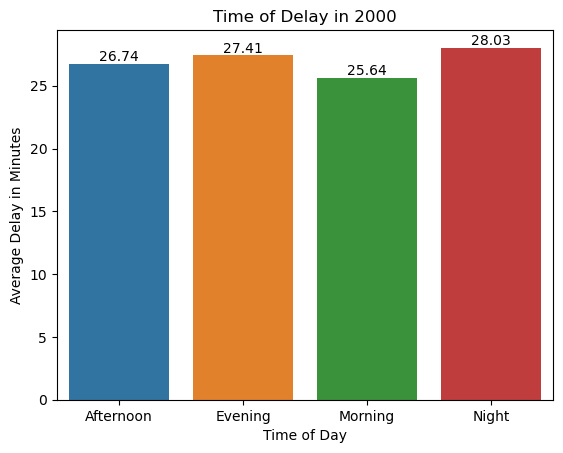

In [53]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2000.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2000)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2000")

plt.show()

#### Morning has the least amount of delay duration with 25.64 minutes (2 decimal point) in 2000.

In [54]:
Year2000_df['DayOfWeek'] = Year2000_df.apply(h, axis=1)
Year2000_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\1961991774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2000_df['DayOfWeek'] = Year2000_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay  \
0        2000      1          28     Friday    19.06       7.0   Evening   
1        2000      1          29   Saturday    19.39      40.0   Evening   
3        2000      1          31     Monday    18.52      -7.0   Evening   
4        2000      1           1   Saturday    10.57      -4.0   Morning   
6        2000      1           3     Monday    11.21      20.0   Morning   
...       ...    ...         ...        ...      ...       ...       ...   
5683042  2000     12           9   Saturday     9.41      -4.0   Morning   
5683043  2000     12          10     Sunday     9.25     -20.0   Morning   
5683044  2000     12          11     Monday     9.49       4.0   Morning   
5683045  2000     12          12    Tuesday    10.05      20.0   Morning   
5683046  2000     12          13  Wednesday     9.48       3.0   Morning   

        DelayStatus  
0                No  
1               Yes  
3                No  
4                No  
6               Yes  
...             ...  
5683042          No  
5683043          No  
5683044          No  
5683045         Yes  
5683046          No  

[4965127 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [55]:
Average_DayOfWeek_Delay2000 = Year2000_df[(Year2000_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2000

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

ArrDelay
DayOfWeek           
Friday     27.213372
Monday     26.938180
Saturday   26.757081
Sunday     27.098823
Thursday   27.191196
Tuesday    26.797649
Wednesday  26.853621

In [56]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2000.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2000)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2000")

plt.show()

#### Saturday has the least amount of delay duration with 26.76 minutes (2 decimal point) in 2000.

### 2001 Data

In [57]:
Year2001_df = pd.read_csv('2001.csv', encoding='Latin-1')

# Use read_csv() function to read csv file as data frame 
# Encoding is to set the encoding parameter to ISO-8859-1 as the data is encoded in a way that python cannot decode.

Read 2001 csv file as a data frame.

In [58]:
Year2001_df = Year2001_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2001_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2001      1          17          3   1931.0      -3.0
1        2001      1          18          4   1938.0       4.0
2        2001      1          19          5   1957.0      23.0
3        2001      1          20          6   1944.0      10.0
4        2001      1          21          7   1954.0      20.0
...       ...    ...         ...        ...      ...       ...
5967775  2001     12          14          5   1159.0       4.0
5967776  2001     12          15          6   1158.0       3.0
5967777  2001     12          16          7   1147.0      -8.0
5967778  2001     12          17          1   1151.0      -4.0
5967779  2001     12          18          2   1158.0       3.0

[5967780 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [59]:
Year2001_df.isna().sum()  #Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       244107
ArrDelay      244107
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [60]:
Year2001_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)    # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [61]:
Year2001_df.isna().sum()      # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [62]:
Year2001_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  5.72367e+06  5.72367e+06  5.72367e+06  5.72367e+06  5.72367e+06   
mean          2001      6.29158      15.7132      3.94983      1489.81   
std              0      3.38175      8.82799      1.99794       511.18   
min           2001            1            1            1            1   
25%           2001            3            8            2         1110   
50%           2001            6           16            4         1522   
75%           2001            9           23            6         1920   
max           2001           12           31            7         2400   

          ArrDelay  
count  5.72367e+06  
mean       5.52825  
std        31.4293  
min          -1116  
25%             -9  
50%             -2  
75%             10  
max           1688

Noticed that 'ArrDelay' column might have outliers as the minimum is -1116 and maximum is 1688 which are more than 18 hours.

In [63]:
Q1 = np.percentile(Year2001_df['ArrDelay'], 25)    # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2001_df['ArrDelay'], 75)    # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                      # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR                 # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR                 # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-37.5, 38.5)

The lower limit is -37.5 minutes and upper limit is 38.5 minutes.

In [64]:
Year2001_df = Year2001_df[(Year2001_df.ArrDelay <= Upper) & (Year2001_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [65]:
Year2001_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 38.5 or less than negative 37.5 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  5.24293e+06  5.24293e+06  5.24293e+06  5.24293e+06  5.24293e+06   
mean          2001      6.33737      15.7036      3.93833      1479.06   
std              0      3.39152      8.85326      2.00317       496.94   
min           2001            1            1            1            1   
25%           2001            3            8            2         1103   
50%           2001            6           16            4         1507   
75%           2001            9           23            6         1907   
max           2001           12           31            7         2400   

          ArrDelay  
count  5.24293e+06  
mean      -1.28197  
std        13.2137  
min            -37  
25%            -10  
50%             -3  
75%              6  
max             38

There were no outliers and values are in acceptable range.

Noticed that the minimum for 'ArrTime' column is 1 and maximum is 2400 which is in acceptable range.

Thus, we need make sure 'ArrTime' column has a format that is readable and consistent as 1 can be an invalid time in 24hour clock.

In [66]:
Year2001_df['ArrTime'] = Year2001_df['ArrTime']/100    # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2001_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\667881291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2001_df['ArrTime'] = Year2001_df['ArrTime']/100    # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2001      1          17          3    19.31      -3.0
1        2001      1          18          4    19.38       4.0
2        2001      1          19          5    19.57      23.0
3        2001      1          20          6    19.44      10.0
4        2001      1          21          7    19.54      20.0
...       ...    ...         ...        ...      ...       ...
5967775  2001     12          14          5    11.59       4.0
5967776  2001     12          15          6    11.58       3.0
5967777  2001     12          16          7    11.47      -8.0
5967778  2001     12          17          1    11.51      -4.0
5967779  2001     12          18          2    11.58       3.0

[5242930 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm

In [67]:
Year2001_df['TimeofDay'] = Year2001_df.apply(f, axis=1)
Year2001_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\3013223202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2001_df['TimeofDay'] = Year2001_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay
0        2001      1          17          3    19.31      -3.0   Evening
1        2001      1          18          4    19.38       4.0   Evening
2        2001      1          19          5    19.57      23.0   Evening
3        2001      1          20          6    19.44      10.0   Evening
4        2001      1          21          7    19.54      20.0   Evening
...       ...    ...         ...        ...      ...       ...       ...
5967775  2001     12          14          5    11.59       4.0   Morning
5967776  2001     12          15          6    11.58       3.0   Morning
5967777  2001     12          16          7    11.47      -8.0   Morning
5967778  2001     12          17          1    11.51      -4.0   Morning
5967779  2001     12          18          2    11.58       3.0   Morning

[5242930 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [68]:
Year2001_df['DelayStatus'] = Year2001_df.apply(g, axis=1)
Year2001_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\848004254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2001_df['DelayStatus'] = Year2001_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay  \
0        2001      1          17          3    19.31      -3.0   Evening   
1        2001      1          18          4    19.38       4.0   Evening   
2        2001      1          19          5    19.57      23.0   Evening   
3        2001      1          20          6    19.44      10.0   Evening   
4        2001      1          21          7    19.54      20.0   Evening   
...       ...    ...         ...        ...      ...       ...       ...   
5967775  2001     12          14          5    11.59       4.0   Morning   
5967776  2001     12          15          6    11.58       3.0   Morning   
5967777  2001     12          16          7    11.47      -8.0   Morning   
5967778  2001     12          17          1    11.51      -4.0   Morning   
5967779  2001     12          18          2    11.58       3.0   Morning   

        DelayStatus  
0                No  
1                No  
2               Yes  
3                No  
4               Yes  
...             ...  
5967775          No  
5967776          No  
5967777          No  
5967778          No  
5967779          No  

[5242930 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [69]:
Average_TimeofDay_Delay2001 = Year2001_df[(Year2001_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2001

ArrDelay
TimeofDay           
Afternoon  24.556970
Evening    24.936580
Morning    23.894453
Night      25.278540

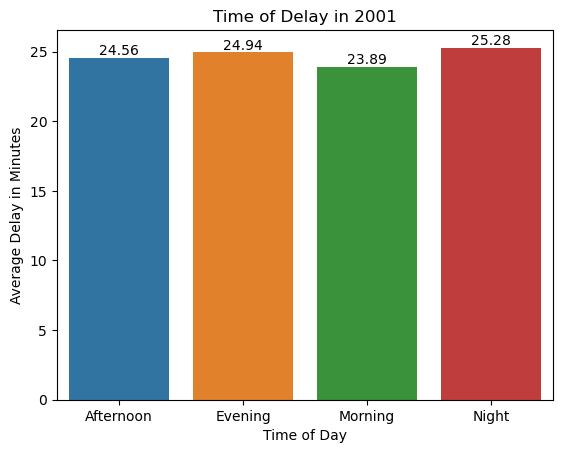

In [70]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2001.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2001)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2001")

plt.show()

#### Morning has the least amount of delay duration with 23.89 minutes (2 decimal point) in 2001.

In [71]:
Year2001_df['DayOfWeek'] = Year2001_df.apply(h, axis=1)
Year2001_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2274391924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2001_df['DayOfWeek'] = Year2001_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay  \
0        2001      1          17  Wednesday    19.31      -3.0   Evening   
1        2001      1          18   Thursday    19.38       4.0   Evening   
2        2001      1          19     Friday    19.57      23.0   Evening   
3        2001      1          20   Saturday    19.44      10.0   Evening   
4        2001      1          21     Sunday    19.54      20.0   Evening   
...       ...    ...         ...        ...      ...       ...       ...   
5967775  2001     12          14     Friday    11.59       4.0   Morning   
5967776  2001     12          15   Saturday    11.58       3.0   Morning   
5967777  2001     12          16     Sunday    11.47      -8.0   Morning   
5967778  2001     12          17     Monday    11.51      -4.0   Morning   
5967779  2001     12          18    Tuesday    11.58       3.0   Morning   

        DelayStatus  
0                No  
1                No  
2               Yes  
3                No  
4               Yes  
...             ...  
5967775          No  
5967776          No  
5967777          No  
5967778          No  
5967779          No  

[5242930 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [72]:
Average_DayOfWeek_Delay2001 = Year2001_df[(Year2001_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2001

ArrDelay
DayOfWeek           
Friday     24.852395
Monday     24.580730
Saturday   24.687830
Sunday     24.673486
Thursday   24.711253
Tuesday    24.568961
Wednesday  24.601041

In [73]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2001.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2001)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2001")

plt.show()

#### Tuesday has the least amount of delay duration with 24.57 minutes (2 decimal point) in 2001.

### 2002 Data

In [74]:
Year2002_df = pd.read_csv('2002.csv', encoding='Latin-1')

# Use read_csv() function to read csv file as data frame 
# Encoding is to set the encoding parameter to ISO-8859-1 as the data is encoded in a way that python cannot decode.

Read 2002 csv file as a data frame.

In [75]:
Year2002_df = Year2002_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2002_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2002      1          13          7   2342.0     -11.0
1        2002      1          14          1   2347.0      -6.0
2        2002      1          15          2   2342.0     -11.0
3        2002      1          16          3   2340.0     -13.0
4        2002      1          17          4   2345.0      -8.0
...       ...    ...         ...        ...      ...       ...
5271354  2002     12           9          1    503.0       6.0
5271355  2002     12          10          2    505.0       8.0
5271356  2002     12          11          3    543.0      46.0
5271357  2002     12          12          4    508.0       6.0
5271358  2002     12          13          5    515.0      13.0

[5271359 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [76]:
Year2002_df.isna().sum()     # Use isna() function to see if there is any NA value in each columns

Year              0
Month             0
DayofMonth        0
DayOfWeek         0
ArrTime       73499
ArrDelay      73499
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [77]:
Year2002_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)    # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [78]:
Year2002_df.isna().sum()     # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [79]:
Year2002_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  5.19786e+06  5.19786e+06  5.19786e+06  5.19786e+06  5.19786e+06   
mean          2002      6.50678      15.7219      3.94069      1502.31   
std              0      3.40853      8.76826      1.99287      488.682   
min           2002            1            1            1            1   
25%           2002            4            8            2         1124   
50%           2002            7           16            4         1528   
75%           2002            9           23            6         1917   
max           2002           12           31            7         2400   

          ArrDelay  
count  5.19786e+06  
mean       3.19124  
std        29.4793  
min           -987  
25%            -10  
50%             -3  
75%              8  
max           2137

Noticed that 'ArrDelay' column might have outliers as the minimum is -987 and maximum is 2137 which are more than 16 hours.

In [80]:
Q1 = np.percentile(Year2002_df['ArrDelay'], 25)       # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2002_df['ArrDelay'], 75)       # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                         # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR             # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR             # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-37.0, 35.0)

The lower limit is -37 minutes and upper limit is 35 minutes.

In [81]:
Year2002_df = Year2002_df[(Year2002_df.ArrDelay <= Upper) & (Year2002_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [82]:
Year2002_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 35 or less than negative 37 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  4.81483e+06  4.81483e+06  4.81483e+06  4.81483e+06  4.81483e+06   
mean          2002      6.50747      15.7289      3.94278      1490.44   
std              0      3.41287       8.7557      1.99558      477.618   
min           2002            1            1            1            1   
25%           2002            4            8            2         1117   
50%           2002            7           16            4         1514   
75%           2002            9           23            6         1904   
max           2002           12           31            7         2400   

          ArrDelay  
count  4.81483e+06  
mean      -2.50011  
std        12.7411  
min            -37  
25%            -11  
50%             -4  
75%              5  
max             35

There were no outliers and values are in acceptable range.

Noticed that the minimum for 'ArrTime' column is 1 and maximum is 2400 which is in acceptable range.

Thus, we need make sure 'ArrTime' column has a format that is readable and consistent as 1 can be an invalid time in 24hour clock.

In [83]:
Year2002_df['ArrTime'] = Year2002_df['ArrTime']/100     # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2002_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\955163735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2002_df['ArrTime'] = Year2002_df['ArrTime']/100     # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2002      1          13          7    23.42     -11.0
1        2002      1          14          1    23.47      -6.0
2        2002      1          15          2    23.42     -11.0
3        2002      1          16          3    23.40     -13.0
4        2002      1          17          4    23.45      -8.0
...       ...    ...         ...        ...      ...       ...
5271353  2002     12           8          7     5.00       3.0
5271354  2002     12           9          1     5.03       6.0
5271355  2002     12          10          2     5.05       8.0
5271357  2002     12          12          4     5.08       6.0
5271358  2002     12          13          5     5.15      13.0

[4814834 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [84]:
Year2002_df['TimeofDay'] = Year2002_df.apply(f, axis=1)
Year2002_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2357589631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2002_df['TimeofDay'] = Year2002_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay
0        2002      1          13          7    23.42     -11.0     Night
1        2002      1          14          1    23.47      -6.0     Night
2        2002      1          15          2    23.42     -11.0     Night
3        2002      1          16          3    23.40     -13.0     Night
4        2002      1          17          4    23.45      -8.0     Night
...       ...    ...         ...        ...      ...       ...       ...
5271353  2002     12           8          7     5.00       3.0     Night
5271354  2002     12           9          1     5.03       6.0     Night
5271355  2002     12          10          2     5.05       8.0     Night
5271357  2002     12          12          4     5.08       6.0     Night
5271358  2002     12          13          5     5.15      13.0     Night

[4814834 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [85]:
Year2002_df['DelayStatus'] = Year2002_df.apply(g, axis=1)
Year2002_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\4162587113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2002_df['DelayStatus'] = Year2002_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay  \
0        2002      1          13          7    23.42     -11.0     Night   
1        2002      1          14          1    23.47      -6.0     Night   
2        2002      1          15          2    23.42     -11.0     Night   
3        2002      1          16          3    23.40     -13.0     Night   
4        2002      1          17          4    23.45      -8.0     Night   
...       ...    ...         ...        ...      ...       ...       ...   
5271353  2002     12           8          7     5.00       3.0     Night   
5271354  2002     12           9          1     5.03       6.0     Night   
5271355  2002     12          10          2     5.05       8.0     Night   
5271357  2002     12          12          4     5.08       6.0     Night   
5271358  2002     12          13          5     5.15      13.0     Night   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
5271353          No  
5271354          No  
5271355          No  
5271357          No  
5271358          No  

[4814834 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [86]:
Average_TimeofDay_Delay2002 = Year2002_df[(Year2002_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2002

ArrDelay
TimeofDay           
Afternoon  23.435094
Evening    23.812130
Morning    22.988303
Night      24.204289

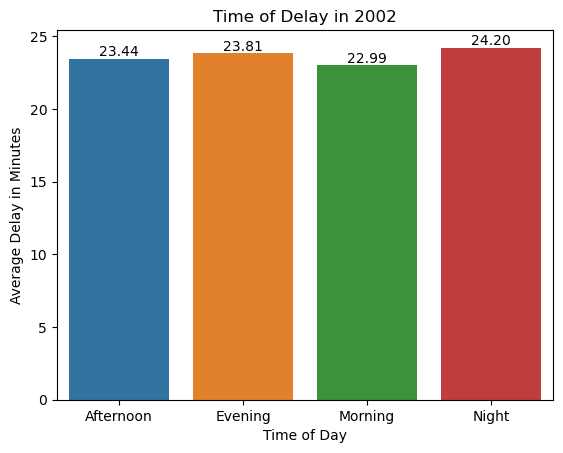

In [87]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2002.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2002)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2002")

plt.show()

#### Morning has the least amount of delay duration with 22.99 minutes (2 decimal point) in 2002.

In [88]:
Year2002_df['DayOfWeek'] = Year2002_df.apply(h, axis=1)
Year2002_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\419277364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2002_df['DayOfWeek'] = Year2002_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay TimeofDay  \
0        2002      1          13     Sunday    23.42     -11.0     Night   
1        2002      1          14     Monday    23.47      -6.0     Night   
2        2002      1          15    Tuesday    23.42     -11.0     Night   
3        2002      1          16  Wednesday    23.40     -13.0     Night   
4        2002      1          17   Thursday    23.45      -8.0     Night   
...       ...    ...         ...        ...      ...       ...       ...   
5271353  2002     12           8     Sunday     5.00       3.0     Night   
5271354  2002     12           9     Monday     5.03       6.0     Night   
5271355  2002     12          10    Tuesday     5.05       8.0     Night   
5271357  2002     12          12   Thursday     5.08       6.0     Night   
5271358  2002     12          13     Friday     5.15      13.0     Night   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
5271353          No  
5271354          No  
5271355          No  
5271357          No  
5271358          No  

[4814834 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [89]:
Average_DayOfWeek_Delay2002 = Year2002_df[(Year2002_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2002

ArrDelay
DayOfWeek           
Friday     23.693297
Monday     23.592309
Saturday   23.474923
Sunday     23.660429
Thursday   23.604326
Tuesday    23.521578
Wednesday  23.589232

In [90]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2002.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2002)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2002")

plt.show()

#### Saturday has the least amount of delay duration with 23.47 minutes (2 decimal point) in 2002.

### 2003 Data

In [91]:
Year2003_df = pd.read_csv('2003.csv', low_memory=False)

# Use read_csv() function to read csv file as data frame 
# Set low memory to false as one of the columns has mixed data types and it requires python to use a lot memory to identify the type

Read 2003 csv file as a data frame.

In [92]:
Year2003_df = Year2003_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2003_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2003      1          29          3   1912.0      -1.0
1        2003      1          30          4   1910.0      -3.0
2        2003      1          31          5   1936.0      23.0
3        2003      1           1          3   1625.0      -9.0
4        2003      1           2          4   1726.0      52.0
...       ...    ...         ...        ...      ...       ...
6488535  2003     12           5          5   1326.0      47.0
6488536  2003     12           5          5   2240.0      54.0
6488537  2003     12           5          5   1217.0      -5.0
6488538  2003     12           5          5    911.0       3.0
6488539  2003     12           5          5   1626.0      -1.0

[6488540 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [93]:
Year2003_df.isna().sum()      # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       112850
ArrDelay      112851
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [94]:
Year2003_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)     # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [95]:
Year2003_df.isna().sum()        # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [96]:
Year2003_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.37569e+06  6.37569e+06  6.37569e+06  6.37569e+06  6.37569e+06   
mean          2003      6.53276      15.7358      3.93433      1504.36   
std              0      3.44518      8.78733      1.98813      482.091   
min           2003            1            1            1            1   
25%           2003            4            8            2         1127   
50%           2003            7           16            4         1527   
75%           2003           10           23            6         1914   
max           2003           12           31            7         2920   

          ArrDelay  
count  6.37569e+06  
mean       3.59669  
std        30.3156  
min           -937  
25%            -10  
50%             -3  
75%              7  
max           1612

Noticed that 'ArrDelay' column might have outliers as the minimum is -937 and maximum is 1612 which are more than 15 hours.

The maximum value of 'ArrTime' is 2920 which is not in acceptable range as 2400 represents 12am.

In [97]:
Q1 = np.percentile(Year2003_df['ArrDelay'], 25)    # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2003_df['ArrDelay'], 75)    # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                      # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR          # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR          # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-35.5, 32.5)

The lower limit is -35.5 minutes and upper limit is 32.5 minutes.

In [98]:
Year2003_df = Year2003_df[(Year2003_df.ArrDelay <= Upper) & (Year2003_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [99]:
Year2003_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 32.5 or less than negative 35.5 minutes.

Year       Month  DayofMonth   DayOfWeek     ArrTime    ArrDelay
count  5.8302e+06  5.8302e+06  5.8302e+06  5.8302e+06  5.8302e+06  5.8302e+06
mean         2003     6.51872     15.7889     3.93483     1489.72    -2.81053
std             0     3.43899     8.79676     1.98957      470.76     12.0064
min          2003           1           1           1           1         -35
25%          2003           4           8           2        1118         -11
50%          2003           7          16           4        1510          -4
75%          2003          10          23           6        1859           4
max          2003          12          31           7        2842          32

There were no outliers and values are in acceptable range for all columns except 'ArrTime'.

The maximum of 'ArrTime' changed to 2842 which is more than 2400 and it is an invalid value as 2400 represents 12am.

In [100]:
Year2003_df['ArrTime'] = Year2003_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2003_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\3580660447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2003_df['ArrTime'] = Year2003_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2003      1          29          3    19.12      -1.0
1        2003      1          30          4    19.10      -3.0
2        2003      1          31          5    19.36      23.0
3        2003      1           1          3    16.25      -9.0
5        2003      1           3          5    16.40       6.0
...       ...    ...         ...        ...      ...       ...
6488522  2003     12           5          5    20.48       4.0
6488532  2003     12           5          5    22.26      27.0
6488537  2003     12           5          5    12.17      -5.0
6488538  2003     12           5          5     9.11       3.0
6488539  2003     12           5          5    16.26      -1.0

[5830195 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [101]:
Year2003_df = Year2003_df[(Year2003_df.ArrTime <= 24)]      # Limit the maximum value for 'ArrTime' to only 24
Year2003_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2003      1          29          3    19.12      -1.0
1        2003      1          30          4    19.10      -3.0
2        2003      1          31          5    19.36      23.0
3        2003      1           1          3    16.25      -9.0
5        2003      1           3          5    16.40       6.0
...       ...    ...         ...        ...      ...       ...
6488522  2003     12           5          5    20.48       4.0
6488532  2003     12           5          5    22.26      27.0
6488537  2003     12           5          5    12.17      -5.0
6488538  2003     12           5          5     9.11       3.0
6488539  2003     12           5          5    16.26      -1.0

[5827795 rows x 6 columns]

Ensured that 'ArrTime' has values that are in correct range; 0.01 to 24. 

In [102]:
Year2003_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year       Month  DayofMonth   DayOfWeek     ArrTime    ArrDelay
count  5.8278e+06  5.8278e+06  5.8278e+06  5.8278e+06  5.8278e+06  5.8278e+06
mean         2003     6.51805     15.7888     3.93481     14.8933    -2.81122
std             0     3.43913     8.79677     1.98956     4.70463     12.0056
min          2003           1           1           1        0.01         -35
25%          2003           4           8           2       11.18         -11
50%          2003           7          16           4        15.1          -4
75%          2003          10          23           6       18.59           4
max          2003          12          31           7          24          32

'ArrTime' does not have values more than 24.

In [103]:
Year2003_df['TimeofDay'] = Year2003_df.apply(f, axis=1)
Year2003_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\4132788562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2003_df['TimeofDay'] = Year2003_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay
0        2003      1          29          3    19.12      -1.0    Evening
1        2003      1          30          4    19.10      -3.0    Evening
2        2003      1          31          5    19.36      23.0    Evening
3        2003      1           1          3    16.25      -9.0  Afternoon
5        2003      1           3          5    16.40       6.0  Afternoon
...       ...    ...         ...        ...      ...       ...        ...
6488522  2003     12           5          5    20.48       4.0    Evening
6488532  2003     12           5          5    22.26      27.0      Night
6488537  2003     12           5          5    12.17      -5.0  Afternoon
6488538  2003     12           5          5     9.11       3.0    Morning
6488539  2003     12           5          5    16.26      -1.0  Afternoon

[5827795 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [104]:
Year2003_df['DelayStatus'] = Year2003_df.apply(g, axis=1)
Year2003_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2228139030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2003_df['DelayStatus'] = Year2003_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2003      1          29          3    19.12      -1.0    Evening   
1        2003      1          30          4    19.10      -3.0    Evening   
2        2003      1          31          5    19.36      23.0    Evening   
3        2003      1           1          3    16.25      -9.0  Afternoon   
5        2003      1           3          5    16.40       6.0  Afternoon   
...       ...    ...         ...        ...      ...       ...        ...   
6488522  2003     12           5          5    20.48       4.0    Evening   
6488532  2003     12           5          5    22.26      27.0      Night   
6488537  2003     12           5          5    12.17      -5.0  Afternoon   
6488538  2003     12           5          5     9.11       3.0    Morning   
6488539  2003     12           5          5    16.26      -1.0  Afternoon   

        DelayStatus  
0                No  
1                No  
2               Yes  
3                No  
5                No  
...             ...  
6488522          No  
6488532         Yes  
6488537          No  
6488538          No  
6488539          No  

[5827795 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [105]:
Average_TimeofDay_Delay2003 = Year2003_df[(Year2003_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2003

ArrDelay
TimeofDay           
Afternoon  22.574190
Evening    22.809570
Morning    22.206850
Night      23.072545

In [106]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2003.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2003)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2003")

plt.show()

#### Morning has the least amount of delay duration with 22.21 minutes (2 decimal point) in 2003.

In [107]:
Year2003_df['DayOfWeek'] = Year2003_df.apply(h, axis=1)
Year2003_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\4181925820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2003_df['DayOfWeek'] = Year2003_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2003      1          29  Wednesday    19.12      -1.0    Evening   
1        2003      1          30   Thursday    19.10      -3.0    Evening   
2        2003      1          31     Friday    19.36      23.0    Evening   
3        2003      1           1  Wednesday    16.25      -9.0  Afternoon   
5        2003      1           3     Friday    16.40       6.0  Afternoon   
...       ...    ...         ...        ...      ...       ...        ...   
6488522  2003     12           5     Friday    20.48       4.0    Evening   
6488532  2003     12           5     Friday    22.26      27.0      Night   
6488537  2003     12           5     Friday    12.17      -5.0  Afternoon   
6488538  2003     12           5     Friday     9.11       3.0    Morning   
6488539  2003     12           5     Friday    16.26      -1.0  Afternoon   

        DelayStatus  
0                No  
1                No  
2               Yes  
3                No  
5                No  
...             ...  
6488522          No  
6488532         Yes  
6488537          No  
6488538          No  
6488539          No  

[5827795 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [108]:
Average_DayOfWeek_Delay2003 = Year2003_df[(Year2003_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2003

ArrDelay
DayOfWeek           
Friday     22.644694
Monday     22.685362
Saturday   22.599600
Sunday     22.639665
Thursday   22.722510
Tuesday    22.604788
Wednesday  22.660835

In [109]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2003.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2003)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.3f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2003")

plt.show()

#### Saturday has the least amount of delay duration with 22.60 minutes (3 decimal point) in 2003.

### 2004 Data

In [110]:
Year2004_df = pd.read_csv('2004.csv')    # Use pandas to read csv file as Data Frame

Read 2004 csv file as a data frame.

In [111]:
Year2004_df = Year2004_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2004_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2004      1          12          1    901.0     -14.0
1        2004      1          13          2    911.0      -4.0
2        2004      1          14          3    920.0       5.0
3        2004      1          15          4    859.0     -16.0
4        2004      1          16          5    918.0       3.0
...       ...    ...         ...        ...      ...       ...
7129265  2004     12          16          4   1715.0      -1.0
7129266  2004     12          16          4   1238.0      -1.0
7129267  2004     12          16          4   1507.0       3.0
7129268  2004     12          16          4    720.0      -3.0
7129269  2004     12          16          4    955.0     -13.0

[7129270 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [112]:
Year2004_df.isna().sum()     # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       141541
ArrDelay      141541
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [113]:
Year2004_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)      # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [114]:
Year2004_df.isna().sum()     # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [115]:
Year2004_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.98773e+06  6.98773e+06  6.98773e+06  6.98773e+06  6.98773e+06   
mean          2004       6.5476      15.7567      3.94516      1496.64   
std              0      3.43259       8.7988      1.98634      495.019   
min           2004            1            1            1            1   
25%           2004            4            8            2         1119   
50%           2004            7           16            4         1521   
75%           2004           10           23            6         1915   
max           2004           12           31            7         2955   

          ArrDelay  
count  6.98773e+06  
mean       6.50807  
std        33.3295  
min          -1302  
25%             -9  
50%             -2  
75%             10  
max           1879

Noticed that 'ArrDelay' column might have outliers as the minimum is -1302 and maximum is 1879 which are more than 21 hours.
The maximum value of 'ArrTime' is 2955 which is not in acceptable range as 2400 represents 12am.

In [116]:
Q1 = np.percentile(Year2004_df['ArrDelay'], 25)     # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2004_df['ArrDelay'], 75)     # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                       # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR        # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR        # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-37.5, 38.5)

The lower limit is -37.5 minutes and upper limit is 38.5 minutes.

In [117]:
Year2004_df = Year2004_df[(Year2004_df.ArrDelay <= Upper) & (Year2004_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [118]:
Year2004_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 38.5 or less than negative 37.5 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.34593e+06  6.34593e+06  6.34593e+06  6.34593e+06  6.34593e+06   
mean          2004      6.54226      15.7025      3.95493      1480.76   
std              0      3.42893      8.79102      1.98641      478.648   
min           2004            1            1            1            1   
25%           2004            4            8            2         1110   
50%           2004            7           16            4         1502   
75%           2004           10           23            6         1857   
max           2004           12           31            7         2727   

          ArrDelay  
count  6.34593e+06  
mean      -1.25831  
std        13.3082  
min            -37  
25%            -10  
50%             -3  
75%              6  
max             38

There were no outliers and values are in acceptable range for all columns except 'ArrTime'.

The maximum of 'ArrTime' changed to 2727 which is more than 2400 and it is an invalid value as 2400 represents 12am.

In [119]:
Year2004_df['ArrTime'] = Year2004_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2004_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\385243155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2004_df['ArrTime'] = Year2004_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2004      1          12          1     9.01     -14.0
1        2004      1          13          2     9.11      -4.0
2        2004      1          14          3     9.20       5.0
3        2004      1          15          4     8.59     -16.0
4        2004      1          16          5     9.18       3.0
...       ...    ...         ...        ...      ...       ...
7129265  2004     12          16          4    17.15      -1.0
7129266  2004     12          16          4    12.38      -1.0
7129267  2004     12          16          4    15.07       3.0
7129268  2004     12          16          4     7.20      -3.0
7129269  2004     12          16          4     9.55     -13.0

[6345933 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [120]:
Year2004_df = Year2004_df[(Year2004_df.ArrTime <= 24)]   # Limit the maximum value for 'ArrTime' to only 24
Year2004_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2004      1          12          1     9.01     -14.0
1        2004      1          13          2     9.11      -4.0
2        2004      1          14          3     9.20       5.0
3        2004      1          15          4     8.59     -16.0
4        2004      1          16          5     9.18       3.0
...       ...    ...         ...        ...      ...       ...
7129265  2004     12          16          4    17.15      -1.0
7129266  2004     12          16          4    12.38      -1.0
7129267  2004     12          16          4    15.07       3.0
7129268  2004     12          16          4     7.20      -3.0
7129269  2004     12          16          4     9.55     -13.0

[6343070 rows x 6 columns]

Ensured that 'ArrTime' has values that are in correct range; 0.01 to 24. 

In [121]:
Year2004_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.34307e+06  6.34307e+06  6.34307e+06  6.34307e+06  6.34307e+06   
mean          2004      6.54205      15.7026      3.95493      14.8033   
std              0      3.42881      8.79101      1.98641      4.78322   
min           2004            1            1            1         0.01   
25%           2004            4            8            2         11.1   
50%           2004            7           16            4        15.02   
75%           2004           10           23            6        18.56   
max           2004           12           31            7           24   

          ArrDelay  
count  6.34307e+06  
mean      -1.26041  
std        13.3071  
min            -37  
25%            -10  
50%             -3  
75%              6  
max             38

'ArrTime' does not have values more than 24.

In [122]:
Year2004_df['TimeofDay'] = Year2004_df.apply(f, axis=1)
Year2004_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2366821868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2004_df['TimeofDay'] = Year2004_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay
0        2004      1          12          1     9.01     -14.0    Morning
1        2004      1          13          2     9.11      -4.0    Morning
2        2004      1          14          3     9.20       5.0    Morning
3        2004      1          15          4     8.59     -16.0    Morning
4        2004      1          16          5     9.18       3.0    Morning
...       ...    ...         ...        ...      ...       ...        ...
7129265  2004     12          16          4    17.15      -1.0  Afternoon
7129266  2004     12          16          4    12.38      -1.0  Afternoon
7129267  2004     12          16          4    15.07       3.0  Afternoon
7129268  2004     12          16          4     7.20      -3.0    Morning
7129269  2004     12          16          4     9.55     -13.0    Morning

[6343070 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [123]:
Year2004_df['DelayStatus'] = Year2004_df.apply(g, axis=1)
Year2004_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\3610760620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2004_df['DelayStatus'] = Year2004_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2004      1          12          1     9.01     -14.0    Morning   
1        2004      1          13          2     9.11      -4.0    Morning   
2        2004      1          14          3     9.20       5.0    Morning   
3        2004      1          15          4     8.59     -16.0    Morning   
4        2004      1          16          5     9.18       3.0    Morning   
...       ...    ...         ...        ...      ...       ...        ...   
7129265  2004     12          16          4    17.15      -1.0  Afternoon   
7129266  2004     12          16          4    12.38      -1.0  Afternoon   
7129267  2004     12          16          4    15.07       3.0  Afternoon   
7129268  2004     12          16          4     7.20      -3.0    Morning   
7129269  2004     12          16          4     9.55     -13.0    Morning   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
7129265          No  
7129266          No  
7129267          No  
7129268          No  
7129269          No  

[6343070 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [124]:
Average_TimeofDay_Delay2004 = Year2004_df[(Year2004_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2004

ArrDelay
TimeofDay           
Afternoon  24.580823
Evening    25.055806
Morning    23.984921
Night      25.478136

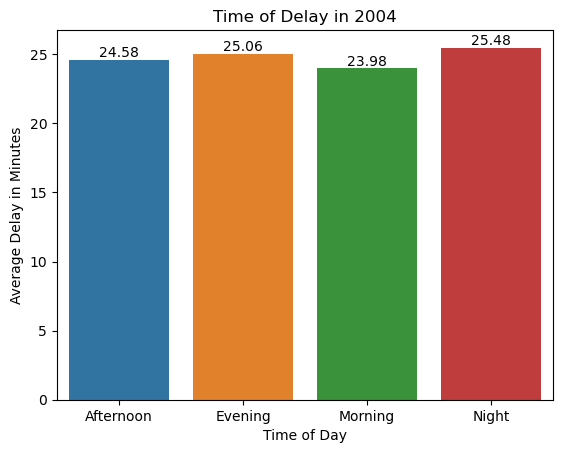

In [125]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2004.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2004)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2004")

plt.show()

#### Morning  has the least amount of delay duration with 23.98 minutes (2 decimal point) in 2004.

In [126]:
Year2004_df['DayOfWeek'] = Year2004_df.apply(h, axis=1)
Year2004_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\3751486028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2004_df['DayOfWeek'] = Year2004_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2004      1          12     Monday     9.01     -14.0    Morning   
1        2004      1          13    Tuesday     9.11      -4.0    Morning   
2        2004      1          14  Wednesday     9.20       5.0    Morning   
3        2004      1          15   Thursday     8.59     -16.0    Morning   
4        2004      1          16     Friday     9.18       3.0    Morning   
...       ...    ...         ...        ...      ...       ...        ...   
7129265  2004     12          16   Thursday    17.15      -1.0  Afternoon   
7129266  2004     12          16   Thursday    12.38      -1.0  Afternoon   
7129267  2004     12          16   Thursday    15.07       3.0  Afternoon   
7129268  2004     12          16   Thursday     7.20      -3.0    Morning   
7129269  2004     12          16   Thursday     9.55     -13.0    Morning   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
7129265          No  
7129266          No  
7129267          No  
7129268          No  
7129269          No  

[6343070 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [127]:
Average_DayOfWeek_Delay2004 = Year2004_df[(Year2004_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2004

ArrDelay
DayOfWeek           
Friday     24.794950
Monday     24.872947
Saturday   24.586061
Sunday     24.788721
Thursday   24.756681
Tuesday    24.799932
Wednesday  24.755833

In [128]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2004.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2004)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2004")

plt.show()

#### Saturday has the least amount of delay duration with 24.59 minutes (2 decimal point) in 2004.

### 2005 Data

In [129]:
Year2005_df = pd.read_csv('2005.csv')     # Use pandas to read csv file as Data Frame

Read 2005 csv file as a data frame.

In [130]:
Year2005_df = Year2005_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2005_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2005      1          28          5   1741.0     -18.0
1        2005      1          29          6   1736.0     -23.0
2        2005      1          30          7   1741.0     -24.0
3        2005      1          31          1   1726.0     -33.0
4        2005      1           2          7   2235.0       3.0
...       ...    ...         ...        ...      ...       ...
7140591  2005     12          22          4   1815.0     -22.0
7140592  2005     12          22          4   1858.0      10.0
7140593  2005     12          22          4   1641.0      -8.0
7140594  2005     12          22          4   1056.0     -15.0
7140595  2005     12          22          4   1621.0       7.0

[7140596 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [131]:
Year2005_df.isna().sum()       # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       147758
ArrDelay      147758
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [132]:
Year2005_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True) #Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [133]:
Year2005_df.isna().sum() #Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [134]:
Year2005_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.99284e+06  6.99284e+06  6.99284e+06  6.99284e+06  6.99284e+06   
mean          2005      6.49141      15.7043      3.94644      1491.42   
std              0      3.40524      8.78576      1.99012      500.177   
min           2005            1            1            1            1   
25%           2005            4            8            2         1113   
50%           2005            6           16            4         1519   
75%           2005            9           23            6         1915   
max           2005           12           31            7         2923   

          ArrDelay  
count  6.99284e+06  
mean       7.18134  
std        34.2068  
min           -939  
25%             -9  
50%             -1  
75%             11  
max           1925

Noticed that 'ArrDelay' column might have outliers as the minimum is -939 and maximum is 1925 which are more than 15 hours.

The maximum value of 'ArrTime' is 2923 which is not in acceptable range as 2400 represents 12am.

In [135]:
Q1 = np.percentile(Year2005_df['ArrDelay'], 25)      # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2005_df['ArrDelay'], 75)      # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                        # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR        # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR        # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-39.0, 41.0)

The lower limit is -39 minutes and upper limit is 41 minutes.

In [136]:
Year2005_df = Year2005_df[(Year2005_df.ArrDelay <= Upper) & (Year2005_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [137]:
Year2005_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 41 or less than negative 39 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.37976e+06  6.37976e+06  6.37976e+06  6.37976e+06  6.37976e+06   
mean          2005      6.49188      15.6799      3.95171      1475.96   
std              0      3.40113      8.79806      1.99398      481.952   
min           2005            1            1            1            1   
25%           2005            4            8            2         1105   
50%           2005            6           16            4         1500   
75%           2005            9           23            6         1855   
max           2005           12           31            7         2552   

          ArrDelay  
count  6.37976e+06  
mean     -0.708292  
std        13.6881  
min            -39  
25%            -10  
50%             -3  
75%              6  
max             41

There were no outliers and values are in acceptable range for all columns except 'ArrTime'.

The maximum of 'ArrTime' changed to 2552 which is more than 2400 and it is an invalid value as 2400 represents 12am.

In [138]:
Year2005_df['ArrTime'] = Year2005_df['ArrTime']/100     # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2005_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\832871057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2005_df['ArrTime'] = Year2005_df['ArrTime']/100     # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2005      1          28          5    17.41     -18.0
1        2005      1          29          6    17.36     -23.0
2        2005      1          30          7    17.41     -24.0
3        2005      1          31          1    17.26     -33.0
4        2005      1           2          7    22.35       3.0
...       ...    ...         ...        ...      ...       ...
7140591  2005     12          22          4    18.15     -22.0
7140592  2005     12          22          4    18.58      10.0
7140593  2005     12          22          4    16.41      -8.0
7140594  2005     12          22          4    10.56     -15.0
7140595  2005     12          22          4    16.21       7.0

[6379757 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [139]:
Year2005_df = Year2005_df[(Year2005_df.ArrTime <= 24)]     # Limit the maximum value for 'ArrTime' to only 24
Year2005_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2005      1          28          5    17.41     -18.0
1        2005      1          29          6    17.36     -23.0
2        2005      1          30          7    17.41     -24.0
3        2005      1          31          1    17.26     -33.0
4        2005      1           2          7    22.35       3.0
...       ...    ...         ...        ...      ...       ...
7140591  2005     12          22          4    18.15     -22.0
7140592  2005     12          22          4    18.58      10.0
7140593  2005     12          22          4    16.41      -8.0
7140594  2005     12          22          4    10.56     -15.0
7140595  2005     12          22          4    16.21       7.0

[6376501 rows x 6 columns]

Ensured that 'ArrTime' has values that are in correct range; 0.01 to 24. 

In [140]:
Year2005_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year       Month  DayofMonth   DayOfWeek     ArrTime    ArrDelay
count  6.3765e+06  6.3765e+06  6.3765e+06  6.3765e+06  6.3765e+06  6.3765e+06
mean         2005     6.49241     15.6799     3.95172     14.7548   -0.713507
std             0     3.40112     8.79808     1.99399     4.81599     13.6844
min          2005           1           1           1        0.01         -39
25%          2005           4           8           2       11.05         -10
50%          2005           6          16           4          15          -3
75%          2005           9          23           6       18.55           6
max          2005          12          31           7          24          41

'ArrTime' does not have values more than 24.

In [141]:
Year2005_df['TimeofDay'] = Year2005_df.apply(f, axis=1)
Year2005_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2187108096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2005_df['TimeofDay'] = Year2005_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay
0        2005      1          28          5    17.41     -18.0  Afternoon
1        2005      1          29          6    17.36     -23.0  Afternoon
2        2005      1          30          7    17.41     -24.0  Afternoon
3        2005      1          31          1    17.26     -33.0  Afternoon
4        2005      1           2          7    22.35       3.0      Night
...       ...    ...         ...        ...      ...       ...        ...
7140591  2005     12          22          4    18.15     -22.0    Evening
7140592  2005     12          22          4    18.58      10.0    Evening
7140593  2005     12          22          4    16.41      -8.0  Afternoon
7140594  2005     12          22          4    10.56     -15.0    Morning
7140595  2005     12          22          4    16.21       7.0  Afternoon

[6376501 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [142]:
Year2005_df['DelayStatus'] = Year2005_df.apply(g, axis=1)
Year2005_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2144274517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2005_df['DelayStatus'] = Year2005_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2005      1          28          5    17.41     -18.0  Afternoon   
1        2005      1          29          6    17.36     -23.0  Afternoon   
2        2005      1          30          7    17.41     -24.0  Afternoon   
3        2005      1          31          1    17.26     -33.0  Afternoon   
4        2005      1           2          7    22.35       3.0      Night   
...       ...    ...         ...        ...      ...       ...        ...   
7140591  2005     12          22          4    18.15     -22.0    Evening   
7140592  2005     12          22          4    18.58      10.0    Evening   
7140593  2005     12          22          4    16.41      -8.0  Afternoon   
7140594  2005     12          22          4    10.56     -15.0    Morning   
7140595  2005     12          22          4    16.21       7.0  Afternoon   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
7140591          No  
7140592          No  
7140593          No  
7140594          No  
7140595          No  

[6376501 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [143]:
Average_TimeofDay_Delay2005 = Year2005_df[(Year2005_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2005

ArrDelay
TimeofDay           
Afternoon  25.498163
Evening    26.082147
Morning    24.707485
Night      26.637213

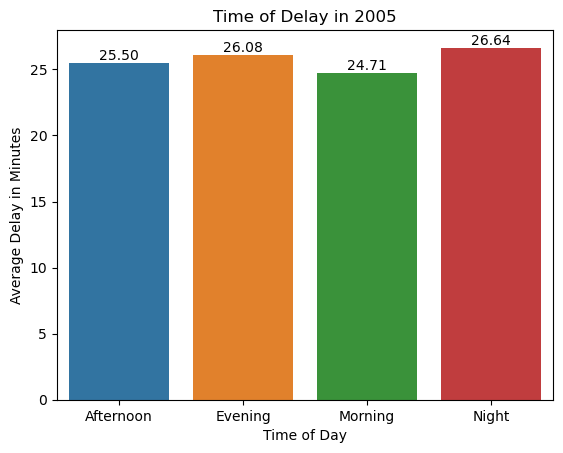

In [144]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2005.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2005)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2005")

plt.show()

#### Morning has the least amount of delay duration with 24.71 minutes (2 decimal point) in 2005.

In [145]:
Year2005_df['DayOfWeek'] = Year2005_df.apply(h, axis=1)
Year2005_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\3833990557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2005_df['DayOfWeek'] = Year2005_df.apply(h, axis=1)


Year  Month  DayofMonth DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2005      1          28    Friday    17.41     -18.0  Afternoon   
1        2005      1          29  Saturday    17.36     -23.0  Afternoon   
2        2005      1          30    Sunday    17.41     -24.0  Afternoon   
3        2005      1          31    Monday    17.26     -33.0  Afternoon   
4        2005      1           2    Sunday    22.35       3.0      Night   
...       ...    ...         ...       ...      ...       ...        ...   
7140591  2005     12          22  Thursday    18.15     -22.0    Evening   
7140592  2005     12          22  Thursday    18.58      10.0    Evening   
7140593  2005     12          22  Thursday    16.41      -8.0  Afternoon   
7140594  2005     12          22  Thursday    10.56     -15.0    Morning   
7140595  2005     12          22  Thursday    16.21       7.0  Afternoon   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
7140591          No  
7140592          No  
7140593          No  
7140594          No  
7140595          No  

[6376501 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [146]:
Average_DayOfWeek_Delay2005 = Year2005_df[(Year2005_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2005

ArrDelay
DayOfWeek           
Friday     25.842979
Monday     25.830888
Saturday   25.525127
Sunday     25.698434
Thursday   25.832736
Tuesday    25.671443
Wednesday  25.738476

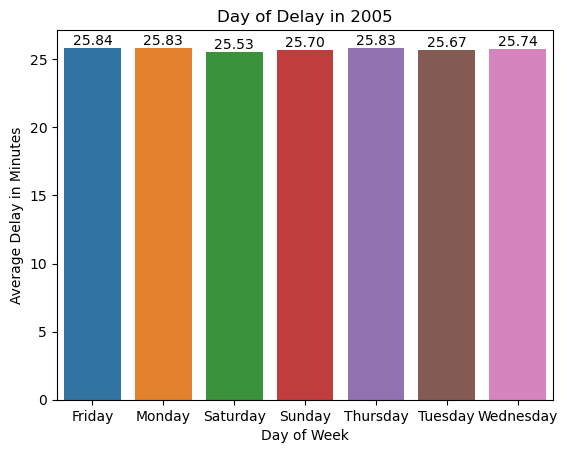

In [147]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2005.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2005)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2005")

plt.show()

#### Saturday has the least amount of delay duration with 25.53 minutes (2 decimal point) in 2005.

### 2006 Data

In [148]:
Year2006_df = pd.read_csv('2006.csv')      # Use pandas to read csv file as Data Frame

Read 2006 csv file as a data frame.

In [149]:
Year2006_df = Year2006_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2006_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2006      1          11          3   1024.0       6.0
1        2006      1          11          3   1313.0      -5.0
2        2006      1          11          3   2110.0     -23.0
3        2006      1          11          3   1925.0      -8.0
4        2006      1          11          3   1015.0       0.0
...       ...    ...         ...        ...      ...       ...
7141917  2006     12          29          5   1452.0      -7.0
7141918  2006     12          29          5   2033.0      62.0
7141919  2006     12          29          5   2254.0      13.0
7141920  2006     12          29          5   2209.0     -14.0
7141921  2006     12          29          5   2213.0     -22.0

[7141922 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [150]:
Year2006_df.isna().sum()      # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       138120
ArrDelay      138120
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [151]:
Year2006_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)     # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [152]:
Year2006_df.isna().sum()      # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [153]:
Year2006_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year       Month  DayofMonth   DayOfWeek     ArrTime    ArrDelay
count  7.0038e+06  7.0038e+06  7.0038e+06  7.0038e+06  7.0038e+06  7.0038e+06
mean         2006     6.55476     15.7231     3.95074     1486.92     8.68284
std             0     3.42079      8.7843     1.99331     500.802     36.5765
min          2006           1           1           1           1        -592
25%          2006           4           8           2        1110          -9
50%          2006           7          16           4        1516          -1
75%          2006          10          23           6        1911          13
max          2006          12          31           7        2955        1779

Noticed that 'ArrDelay' column might have outliers as the minimum is -592 and maximum is 1779 which are more than 9 hours.

The maximum value of 'ArrTime' is 2955 which is not in acceptable range as 2400 represents 12am.

In [154]:
Q1 = np.percentile(Year2006_df['ArrDelay'], 25)    # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2006_df['ArrDelay'], 75)    # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                      # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR      # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR      # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-42.0, 46.0)

The lower limit is -42 minutes and upper limit is 46 minutes.

In [155]:
Year2006_df = Year2006_df[(Year2006_df.ArrDelay <= Upper) & (Year2006_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [156]:
Year2006_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 46 or less than negative 42 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.38493e+06  6.38493e+06  6.38493e+06  6.38493e+06  6.38493e+06   
mean          2006      6.52673      15.6723      3.94963      1472.03   
std              0      3.42441      8.79158      1.99803      482.696   
min           2006            1            1            1            1   
25%           2006            4            8            2         1101   
50%           2006            7           16            4         1458   
75%           2006            9           23            6         1852   
max           2006           12           31            7         2817   

          ArrDelay  
count  6.38493e+06  
mean     0.0728086  
std        14.8928  
min            -42  
25%            -10  
50%             -2  
75%              8  
max             46

There were no outliers and values are in acceptable range for all columns except 'ArrTime'.

The maximum of 'ArrTime' changed to 2817 which is more than 2400 and it is an invalid value as 2400 represents 12am.

In [157]:
Year2006_df['ArrTime'] = Year2006_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2006_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2984324242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2006_df['ArrTime'] = Year2006_df['ArrTime']/100      # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2006      1          11          3    10.24       6.0
1        2006      1          11          3    13.13      -5.0
2        2006      1          11          3    21.10     -23.0
3        2006      1          11          3    19.25      -8.0
4        2006      1          11          3    10.15       0.0
...       ...    ...         ...        ...      ...       ...
7141916  2006     12          29          5    17.06       7.0
7141917  2006     12          29          5    14.52      -7.0
7141919  2006     12          29          5    22.54      13.0
7141920  2006     12          29          5    22.09     -14.0
7141921  2006     12          29          5    22.13     -22.0

[6384934 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [158]:
Year2006_df = Year2006_df[(Year2006_df.ArrTime <= 24)]        # Limit the maximum value for 'ArrTime' to only 24
Year2006_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2006      1          11          3    10.24       6.0
1        2006      1          11          3    13.13      -5.0
2        2006      1          11          3    21.10     -23.0
3        2006      1          11          3    19.25      -8.0
4        2006      1          11          3    10.15       0.0
...       ...    ...         ...        ...      ...       ...
7141916  2006     12          29          5    17.06       7.0
7141917  2006     12          29          5    14.52      -7.0
7141919  2006     12          29          5    22.54      13.0
7141920  2006     12          29          5    22.09     -14.0
7141921  2006     12          29          5    22.13     -22.0

[6383450 rows x 6 columns]

Ensured that 'ArrTime' has values that are in correct range; 0.01 to 24. 

In [159]:
Year2006_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.38345e+06  6.38345e+06  6.38345e+06  6.38345e+06  6.38345e+06   
mean          2006      6.52713      15.6724      3.94961      14.7181   
std              0      3.42445       8.7916      1.99802      4.82534   
min           2006            1            1            1         0.01   
25%           2006            4            8            2        11.01   
50%           2006            7           16            4        14.57   
75%           2006            9           23            6        18.52   
max           2006           12           31            7           24   

          ArrDelay  
count  6.38345e+06  
mean     0.0693973  
std        14.8907  
min            -42  
25%            -10  
50%             -2  
75%              8  
max             46

'ArrTime' does not have values more than 24.

In [160]:
Year2006_df['TimeofDay'] = Year2006_df.apply(f, axis=1)
Year2006_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\1524258963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2006_df['TimeofDay'] = Year2006_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay
0        2006      1          11          3    10.24       6.0    Morning
1        2006      1          11          3    13.13      -5.0  Afternoon
2        2006      1          11          3    21.10     -23.0      Night
3        2006      1          11          3    19.25      -8.0    Evening
4        2006      1          11          3    10.15       0.0    Morning
...       ...    ...         ...        ...      ...       ...        ...
7141916  2006     12          29          5    17.06       7.0  Afternoon
7141917  2006     12          29          5    14.52      -7.0  Afternoon
7141919  2006     12          29          5    22.54      13.0      Night
7141920  2006     12          29          5    22.09     -14.0      Night
7141921  2006     12          29          5    22.13     -22.0      Night

[6383450 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [161]:
Year2006_df['DelayStatus'] = Year2006_df.apply(g, axis=1)
Year2006_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\4216399530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2006_df['DelayStatus'] = Year2006_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2006      1          11          3    10.24       6.0    Morning   
1        2006      1          11          3    13.13      -5.0  Afternoon   
2        2006      1          11          3    21.10     -23.0      Night   
3        2006      1          11          3    19.25      -8.0    Evening   
4        2006      1          11          3    10.15       0.0    Morning   
...       ...    ...         ...        ...      ...       ...        ...   
7141916  2006     12          29          5    17.06       7.0  Afternoon   
7141917  2006     12          29          5    14.52      -7.0  Afternoon   
7141919  2006     12          29          5    22.54      13.0      Night   
7141920  2006     12          29          5    22.09     -14.0      Night   
7141921  2006     12          29          5    22.13     -22.0      Night   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
7141916          No  
7141917          No  
7141919          No  
7141920          No  
7141921          No  

[6383450 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [162]:
Average_TimeofDay_Delay2006 = Year2006_df[(Year2006_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2006

ArrDelay
TimeofDay           
Afternoon  27.097246
Evening    27.805935
Morning    25.962837
Night      28.552438

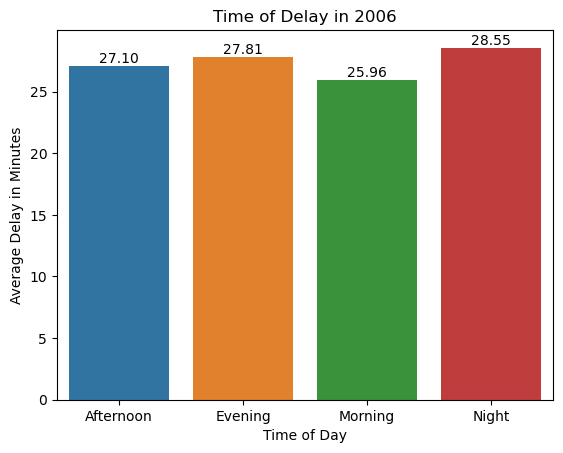

In [163]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2006.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2006)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2006")

plt.show()

#### Morning has the least amount of delay duration with 25.96 minutes (2 decimal point) in 2006.

In [164]:
Year2006_df['DayOfWeek'] = Year2006_df.apply(h, axis=1)
Year2006_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2754696861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2006_df['DayOfWeek'] = Year2006_df.apply(h, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2006      1          11  Wednesday    10.24       6.0    Morning   
1        2006      1          11  Wednesday    13.13      -5.0  Afternoon   
2        2006      1          11  Wednesday    21.10     -23.0      Night   
3        2006      1          11  Wednesday    19.25      -8.0    Evening   
4        2006      1          11  Wednesday    10.15       0.0    Morning   
...       ...    ...         ...        ...      ...       ...        ...   
7141916  2006     12          29     Friday    17.06       7.0  Afternoon   
7141917  2006     12          29     Friday    14.52      -7.0  Afternoon   
7141919  2006     12          29     Friday    22.54      13.0      Night   
7141920  2006     12          29     Friday    22.09     -14.0      Night   
7141921  2006     12          29     Friday    22.13     -22.0      Night   

        DelayStatus  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
7141916          No  
7141917          No  
7141919          No  
7141920          No  
7141921          No  

[6383450 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [165]:
Average_DayOfWeek_Delay2006 = Year2006_df[(Year2006_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2006

ArrDelay
DayOfWeek           
Friday     27.566694
Monday     27.330148
Saturday   27.145684
Sunday     27.360588
Thursday   27.524136
Tuesday    27.287264
Wednesday  27.351245

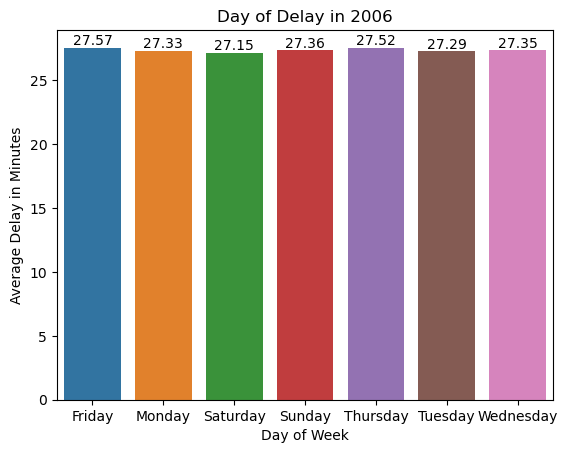

In [166]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2006.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2006)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2006")

plt.show()

#### Saturday has the least amount of delay duration with 27.15 minutes (2 decimal point) in 2006.

### 2007 Data

In [167]:
Year2007_df = pd.read_csv('2007.csv')     # Use pandas to read csv file as Data Frame

Read 2007 csv file as a data frame.

In [168]:
Year2007_df = Year2007_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay']]
Year2007_df

Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2007      1           1          1   1341.0       1.0
1        2007      1           1          1   2043.0       8.0
2        2007      1           1          1   2334.0      34.0
3        2007      1           1          1   1356.0      26.0
4        2007      1           1          1    957.0      -3.0
...       ...    ...         ...        ...      ...       ...
7453210  2007     12          15          6   1749.0      13.0
7453211  2007     12          15          6   2110.0       5.0
7453212  2007     12          15          6   1750.0      15.0
7453213  2007     12          15          6   1658.0      36.0
7453214  2007     12          15          6   2001.0      33.0

[7453215 rows x 6 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelay'.

In [169]:
Year2007_df.isna().sum()    # Use isna() function to see if there is any NA value in each columns

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
ArrTime       177927
ArrDelay      177927
dtype: int64

Found NA values in 'ArrTime' and 'ArrDelay'.

In [170]:
Year2007_df.dropna(subset=['ArrTime', 'ArrDelay'], inplace = True)     # Use dropna function to remove NA values

Removed NA values in 'ArrTime' and 'ArrDelay'.

In [171]:
Year2007_df.isna().sum()    # Use isna() function to see if there is any NA value in each columns

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
ArrTime       0
ArrDelay      0
dtype: int64

There are no NA values in 'ArrTime' and 'ArrDelay' now.

In [172]:
Year2007_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  7.27529e+06  7.27529e+06  7.27529e+06  7.27529e+06  7.27529e+06   
mean          2007      6.52818      15.7237      3.93587       1482.1   
std              0      3.41868      8.79141      1.99353      507.224   
min           2007            1            1            1            1   
25%           2007            4            8            2         1107   
50%           2007            7           16            4         1513   
75%           2007            9           23            6         1911   
max           2007           12           31            7         2400   

          ArrDelay  
count  7.27529e+06  
mean       10.1922  
std        39.3077  
min           -312  
25%             -9  
50%              0  
75%             14  
max           2598

Noticed that 'ArrDelay' column might have outliers as the minimum is -312 and maximum is 2598 which are more than 5 hours.

In [173]:
Q1 = np.percentile(Year2007_df['ArrDelay'], 25)    # Use np.percentile() function to find value of quartile 1
Q3 = np.percentile(Year2007_df['ArrDelay'], 75)    # Use np.percentile() function to find value of quartile 3
IQR = Q3 - Q1                                      # Calculate the interquartile range by substracting quartile 1 from quartile 3

Upper = Q3+1.5*IQR        # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 3
Lower = Q1-1.5*IQR        # Calculate the upper limit by adding 1.5 times of interquartile range to quartile 1

Lower, Upper 

(-43.5, 48.5)

The lower limit is -43.5 minutes and upper limit is 48.5 minutes.

In [174]:
Year2007_df = Year2007_df[(Year2007_df.ArrDelay <= Upper) & (Year2007_df.ArrDelay >= Lower)]

Removed the outliers by limiting the data to only within lower and upper limit ranges.

In [175]:
Year2007_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) 

# Use describe() function to get statistical summary of the data frame
# Use apply() function to simplify the number to without having any exponential in the value
# Check if the 'ArrDelay' has very extreme values such as more than 48.5 or less than negative 43.5 minutes.

Year        Month   DayofMonth    DayOfWeek      ArrTime  \
count  6.58793e+06  6.58793e+06  6.58793e+06  6.58793e+06  6.58793e+06   
mean          2007      6.53309      15.6904       3.9377      1468.56   
std              0       3.4178      8.80484      1.99625      486.594   
min           2007            1            1            1            1   
25%           2007            4            8            2         1059   
50%           2007            7           16            4         1454   
75%           2007           10           23            6         1851   
max           2007           12           31            7         2400   

          ArrDelay  
count  6.58793e+06  
mean      0.615661  
std        15.5072  
min            -43  
25%            -10  
50%             -2  
75%              8  
max             48

There were no outliers and values are in acceptable range.

Noticed that the minimum for 'ArrTime' column is 1 and maximum is 2400 which is in acceptable range.

Thus, we need make sure 'ArrTime' column has a format that is readable and consistent as 1 can be an invalid time in 24hour clock.

In [176]:
Year2007_df['ArrTime'] = Year2007_df['ArrTime']/100    # Divide 'ArrTime' values by 100 to leave them in 2 decimal point
Year2007_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2022803496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2007_df['ArrTime'] = Year2007_df['ArrTime']/100    # Divide 'ArrTime' values by 100 to leave them in 2 decimal point


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay
0        2007      1           1          1    13.41       1.0
1        2007      1           1          1    20.43       8.0
2        2007      1           1          1    23.34      34.0
3        2007      1           1          1    13.56      26.0
4        2007      1           1          1     9.57      -3.0
...       ...    ...         ...        ...      ...       ...
7453210  2007     12          15          6    17.49      13.0
7453211  2007     12          15          6    21.10       5.0
7453212  2007     12          15          6    17.50      15.0
7453213  2007     12          15          6    16.58      36.0
7453214  2007     12          15          6    20.01      33.0

[6587932 rows x 6 columns]

Converted 'ArrTime' to 2 decimal places to make sure 'ArrTime' column has a format that is readable as 1 can be an invalid time in 24hour clock.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [177]:
Year2007_df['TimeofDay'] = Year2007_df.apply(f, axis=1)
Year2007_df

# Use apply() function to perform 'f' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\2078715165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2007_df['TimeofDay'] = Year2007_df.apply(f, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay
0        2007      1           1          1    13.41       1.0  Afternoon
1        2007      1           1          1    20.43       8.0    Evening
2        2007      1           1          1    23.34      34.0      Night
3        2007      1           1          1    13.56      26.0  Afternoon
4        2007      1           1          1     9.57      -3.0    Morning
...       ...    ...         ...        ...      ...       ...        ...
7453210  2007     12          15          6    17.49      13.0  Afternoon
7453211  2007     12          15          6    21.10       5.0      Night
7453212  2007     12          15          6    17.50      15.0  Afternoon
7453213  2007     12          15          6    16.58      36.0  Afternoon
7453214  2007     12          15          6    20.01      33.0    Evening

[6587932 rows x 7 columns]

Created new variable called 'Time of Day' which indicates Morning as 6am to 12pm, Afternoon as 12pm to 6pm, Evening as 6pm to 9pm and Night as 9pm to 6am.

In [178]:
Year2007_df['DelayStatus'] = Year2007_df.apply(g, axis=1)
Year2007_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\1212866261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2007_df['DelayStatus'] = Year2007_df.apply(g, axis=1)


Year  Month  DayofMonth  DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2007      1           1          1    13.41       1.0  Afternoon   
1        2007      1           1          1    20.43       8.0    Evening   
2        2007      1           1          1    23.34      34.0      Night   
3        2007      1           1          1    13.56      26.0  Afternoon   
4        2007      1           1          1     9.57      -3.0    Morning   
...       ...    ...         ...        ...      ...       ...        ...   
7453210  2007     12          15          6    17.49      13.0  Afternoon   
7453211  2007     12          15          6    21.10       5.0      Night   
7453212  2007     12          15          6    17.50      15.0  Afternoon   
7453213  2007     12          15          6    16.58      36.0  Afternoon   
7453214  2007     12          15          6    20.01      33.0    Evening   

        DelayStatus  
0                No  
1                No  
2               Yes  
3               Yes  
4                No  
...             ...  
7453210          No  
7453211          No  
7453212          No  
7453213         Yes  
7453214         Yes  

[6587932 rows x 8 columns]

Created new variable called 'Delay Status' which indicates a delay as 'Yes' and no delay as 'No'.

In [179]:
Average_TimeofDay_Delay2007 = Year2007_df[(Year2007_df.DelayStatus == 'Yes')].groupby('TimeofDay').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_TimeofDay_Delay2007

ArrDelay
TimeofDay           
Afternoon  27.735691
Evening    28.443307
Morning    26.572371
Night      29.357411

In [180]:
fig, ax = plt.subplots()

sns.barplot(x = Average_TimeofDay_Delay2007.index, y = 'ArrDelay', data = Average_TimeofDay_Delay2007)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Time of Delay in 2007")

plt.show()

#### Morning has the least amount of delay duration with 26.57 minutes (2 decimal point) in 2007.

In [181]:
Year2007_df['DayOfWeek'] = Year2007_df.apply(h, axis=1)
Year2007_df

# Use apply () function to perform 'g' function where axis = 1 means for all columns

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_6444\761169872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2007_df['DayOfWeek'] = Year2007_df.apply(h, axis=1)


Year  Month  DayofMonth DayOfWeek  ArrTime  ArrDelay  TimeofDay  \
0        2007      1           1    Monday    13.41       1.0  Afternoon   
1        2007      1           1    Monday    20.43       8.0    Evening   
2        2007      1           1    Monday    23.34      34.0      Night   
3        2007      1           1    Monday    13.56      26.0  Afternoon   
4        2007      1           1    Monday     9.57      -3.0    Morning   
...       ...    ...         ...       ...      ...       ...        ...   
7453210  2007     12          15  Saturday    17.49      13.0  Afternoon   
7453211  2007     12          15  Saturday    21.10       5.0      Night   
7453212  2007     12          15  Saturday    17.50      15.0  Afternoon   
7453213  2007     12          15  Saturday    16.58      36.0  Afternoon   
7453214  2007     12          15  Saturday    20.01      33.0    Evening   

        DelayStatus  
0                No  
1                No  
2               Yes  
3               Yes  
4                No  
...             ...  
7453210          No  
7453211          No  
7453212          No  
7453213         Yes  
7453214         Yes  

[6587932 rows x 8 columns]

Modified the variable called 'DayofWeek' with indication that 1 is for Monday, 2 is for Tuesday, 3 is for Wednesday, 4 is for Thursday, 5 is for Friday, 6 is for Saturday, 7 is for Sunday.

In [182]:
Average_DayOfWeek_Delay2007 = Year2007_df[(Year2007_df.DelayStatus == 'Yes')].groupby('DayOfWeek').agg({'ArrDelay': 'mean'})
# Subset data with 'DelayStatus' showing 'Yes'
# Use groupby() function to sort the data in group
# Use agg() function to find the mean in delays duration

Average_DayOfWeek_Delay2007

ArrDelay
DayOfWeek           
Friday     28.210505
Monday     28.140132
Saturday   27.766333
Sunday     28.058014
Thursday   28.112785
Tuesday    27.911281
Wednesday  28.012443

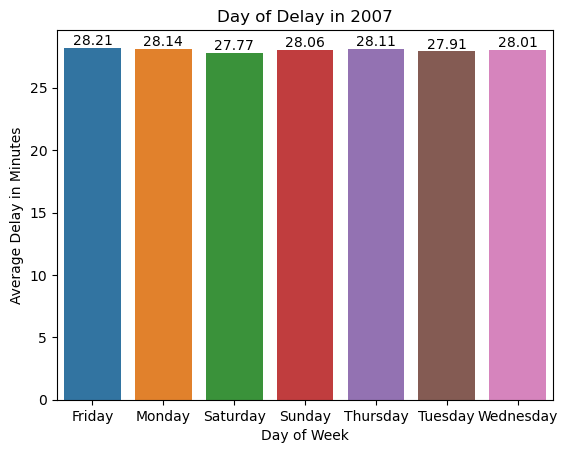

In [183]:
fig, ax = plt.subplots()

sns.barplot(x = Average_DayOfWeek_Delay2007.index, y = 'ArrDelay', data = Average_DayOfWeek_Delay2007)
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.2f}')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Average Delay in Minutes")
ax.set_title("Day of Delay in 2007")

plt.show()

#### Saturday has the least amount of delay duration with 27.77 minutes (2 decimal point) in 2007.

In [184]:
Average_TimeofDay_Delay1998['Year'] = ["1998", "1998", "1998", "1998"]
Average_TimeofDay_Delay1999['Year'] = ["1999", "1999", "1999", "1999"]
Average_TimeofDay_Delay2000['Year'] = ["2000", "2000", "2000", "2000"]
Average_TimeofDay_Delay2001['Year'] = ["2001", "2001", "2001", "2001"]
Average_TimeofDay_Delay2002['Year'] = ["2002", "2002", "2002", "2002"]
Average_TimeofDay_Delay2003['Year'] = ["2003", "2003", "2003", "2003"]
Average_TimeofDay_Delay2004['Year'] = ["2004", "2004", "2004", "2004"]
Average_TimeofDay_Delay2005['Year'] = ["2005", "2005", "2005", "2005"]
Average_TimeofDay_Delay2006['Year'] = ["2006", "2006", "2006", "2006"]
Average_TimeofDay_Delay2007['Year'] = ["2007", "2007", "2007", "2007"]

In [185]:
Average_TimeofDay_Delay1998['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay1999['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2000['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2001['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2002['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2003['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2004['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2005['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2006['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]
Average_TimeofDay_Delay2007['TimeofDay'] = ["Afteroon", "Evening", "Morning", "Night"]

In [186]:
Time_Delay = pd.concat([Average_TimeofDay_Delay1998, Average_TimeofDay_Delay1999, Average_TimeofDay_Delay2000, 
                        Average_TimeofDay_Delay2001, Average_TimeofDay_Delay2002, Average_TimeofDay_Delay2003,
                        Average_TimeofDay_Delay2004, Average_TimeofDay_Delay2005, Average_TimeofDay_Delay2006,
                        Average_TimeofDay_Delay2007])

Time_Delay.reset_index(drop=True, inplace=True)

In [187]:
plot = sns.catplot(x = 'Year', y = 'ArrDelay', 
            hue = 'TimeofDay', data = Time_Delay, kind = "bar", height = 9, aspect = 2)
plot.set_axis_labels('Year', 'Average Delay in Minutes', fontsize = 10)
plot.fig.subplots_adjust(top = 0.9)
plot.fig.suptitle('Time of Day Delay across Years')

ax = plot.facet_axis(0, 0)

for c in ax.containers:
    ax.bar_label(c, label_type='edge', fmt='{:,.2f}')

plt.show()

In [188]:
Average_DayOfWeek_Delay1998['Year'] = ["1998", "1998", "1998", "1998", "1998", "1998", "1998"]
Average_DayOfWeek_Delay1999['Year'] = ["1999", "1999", "1999", "1999", "1999", "1999", "1999"]
Average_DayOfWeek_Delay2000['Year'] = ["2000", "2000", "2000", "2000", "2000", "2000", "2000"]
Average_DayOfWeek_Delay2001['Year'] = ["2001", "2001", "2001", "2001", "2001", "2001", "2001"]
Average_DayOfWeek_Delay2002['Year'] = ["2002", "2002", "2002", "2002", "2002", "2002", "2002"]
Average_DayOfWeek_Delay2003['Year'] = ["2003", "2003", "2003", "2003", "2003", "2003", "2003"]
Average_DayOfWeek_Delay2004['Year'] = ["2004", "2004", "2004", "2004", "2004", "2004", "2004"]
Average_DayOfWeek_Delay2005['Year'] = ["2005", "2005", "2005", "2005", "2005", "2005", "2005"]
Average_DayOfWeek_Delay2006['Year'] = ["2006", "2006", "2006", "2006", "2006", "2006", "2006"]
Average_DayOfWeek_Delay2007['Year'] = ["2007", "2007", "2007", "2007", "2007", "2007", "2007"]

In [189]:
Average_DayOfWeek_Delay1998['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay1999['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2000['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2001['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2002['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2003['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2004['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2005['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2006['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]
Average_DayOfWeek_Delay2007['DayOfWeek'] = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]

In [190]:
Day_Delay = pd.concat([Average_DayOfWeek_Delay1998, Average_DayOfWeek_Delay1999, Average_DayOfWeek_Delay2000, 
                        Average_DayOfWeek_Delay2001, Average_DayOfWeek_Delay2002, Average_DayOfWeek_Delay2003,
                        Average_DayOfWeek_Delay2004, Average_DayOfWeek_Delay2005, Average_DayOfWeek_Delay2006,
                        Average_DayOfWeek_Delay2007])

Day_Delay.reset_index(drop=True, inplace=True)

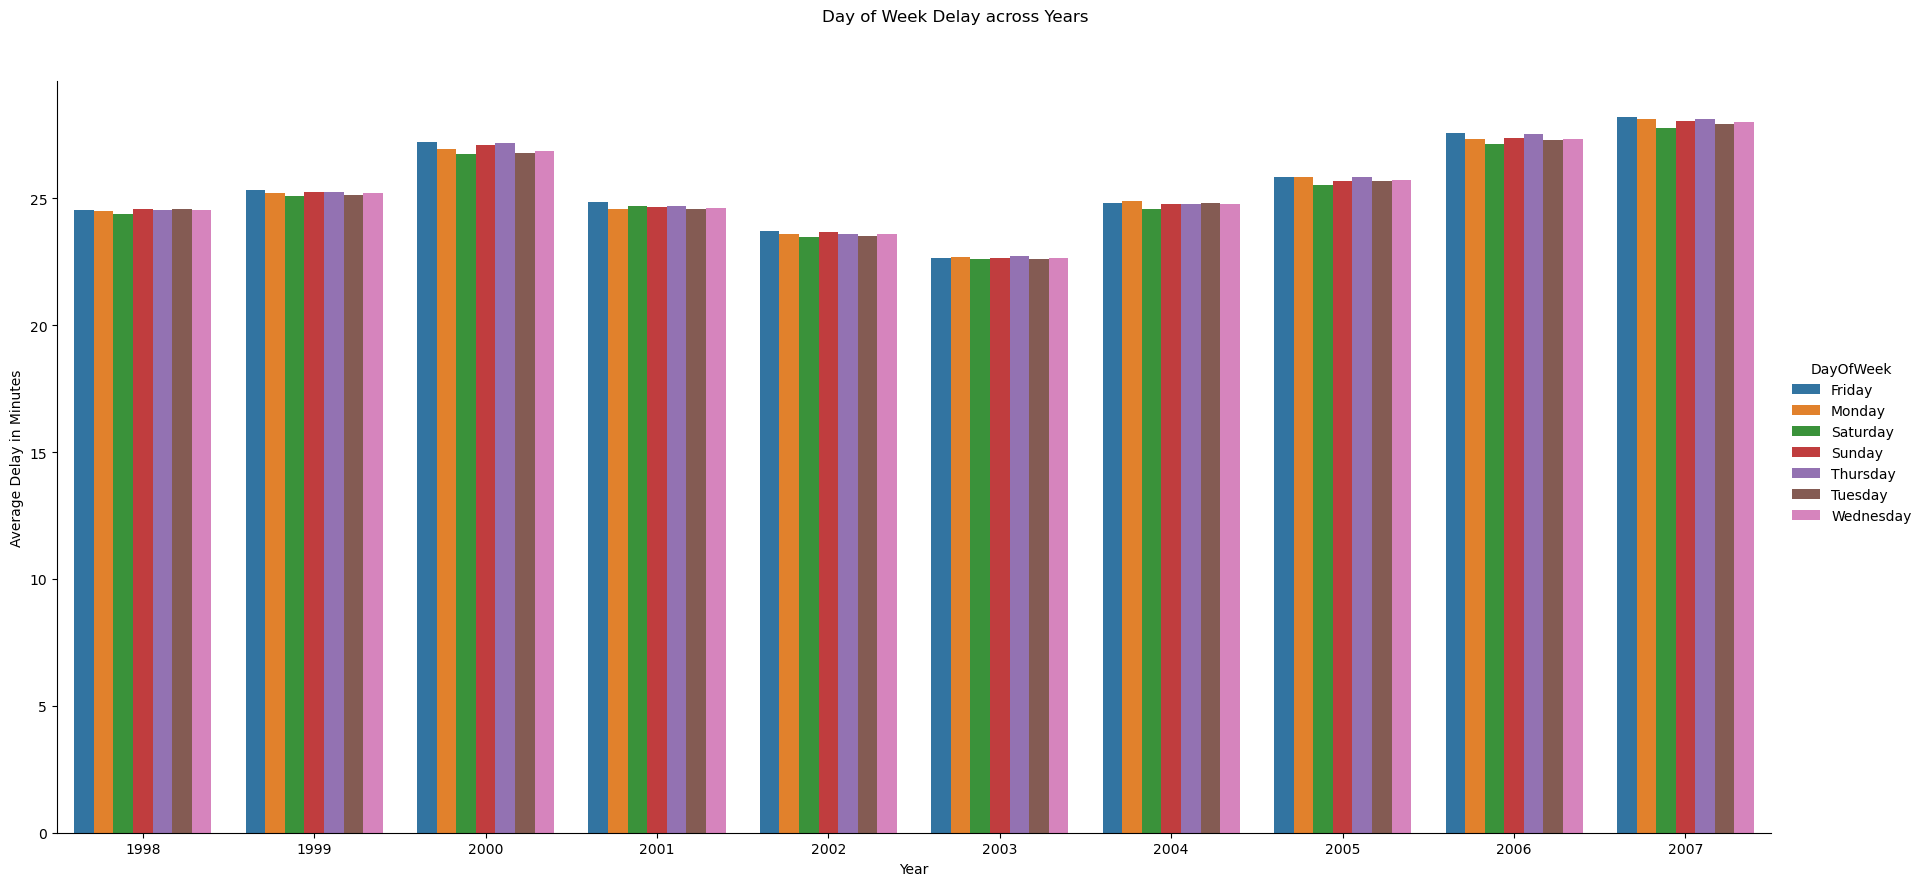

In [191]:
plot = sns.catplot(x = 'Year', y = 'ArrDelay', 
            hue = 'DayOfWeek', data = Day_Delay, kind = "bar", height = 9, aspect = 2)
plot.set_axis_labels('Year', 'Average Delay in Minutes', fontsize = 10)
plot.fig.subplots_adjust(top = 0.9)
plot.fig.suptitle('Day of Week Delay across Years')

ax = plot.facet_axis(0, 0)

plt.show()